# Выберите для построения модели линейной регрессии одну из метрических переменных в качестве зависимой.

## Описание переменных:

    CountryID - ID of the Country
    CountryName - Name of the Country
    HighIncome - Belonging to high income group of countries (1 - belongs, 2 - no)
    Income - Belonging to the income group (low income, middle income, high income) - перекодировать
    Development - Is the country developed or developing - перекодировать
    Region - Region of the country's location - можно перекодировать
    WorldRank - World Rank
    RegionRank - Region Rank
    2022Score - 2022 Score
    PropertyRights - Property Rights
    JudicialEffectiveness - Judicial Effectiveness
    GovernmentIntegrity - Government Integrity
    TaxBurden - Tax Burden
    GovernmentSpending - Government Spending
    FiscalHealth - Fiscal Health
    BusinessFreedom - Business Freedom
    LaborFreedom - Labor Freedom
    MonetaryFreedom - Monetary Freedom
    TradeFreedom - Trade Freedom
    InvestmentFreedom - Investment Freedom
    FinancialFreedom - Financial Freedom
    TariffRate - Tariff Rate (%)
    IncomeTaxRate - Income Tax Rate (%)
    CorporateTaxRate - Corporate Tax Rate (%)
    TaxBurdenofGDP - Tax Burden % of GDP
    GovernmentExpenditurofGDP - Gov't Expenditure % of GDP
    Population - Population (Millions)
    GDP - GDP (Billions, PPP)
    GDP_GrowthRate - GDP Growth Rate (%)
    5Year_GDP_GrowthRate - 5 Year GDP Growth Rate (%)
    GDPperCapita - GDP per Capita (PPP)
    Unemployment - Unemployment (%)
    Inflation - Inflation (%)
    FDIInflow - FDI Inflow (Millions)
    PublicDebt - Public Debt (% of GDP)

## Код

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.model_selection import KFold
from factor_analyzer import FactorAnalyzer, Rotator
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

import warnings
warnings.filterwarnings("ignore") 

In [5]:
df = pd.read_excel("C:/Users/daria/Downloads/index2022_data.xls", index_col=0)
df.head(5)

CountryName  HighIncome         Income Development  \
CountryID                                                       
1          Afghanistan           0     low income  developing   
2              Albania           0  middle income  developing   
3              Algeria           0  middle income  developing   
4               Angola           0  middle income  developing   
5            Argentina           0  middle income  developing   

                                 Region  WorldRank  RegionRank  2022Score  \
CountryID                                                                   
1                          Asia-Pacific        NaN         NaN        NaN   
2                                Europe       50.0        30.0       66.6   
3          Middle East and North Africa      167.0        13.0       45.8   
4                    Sub-Saharan Africa      139.0        29.0       52.6   
5                              Americas      144.0        27.0       50.1   

           PropertyRights  JudicialEffectiveness  ...  \
CountryID                                         ...   
1                     NaN                    NaN  ...   
2                    55.5                   49.8  ...   
3                    27.9                   29.7  ...   
4                    39.8                   25.3  ...   
5                    35.1                   57.9  ...   

           GovernmentExpenditurofGDP   Population      GDP  GDP_GrowthRate  \
CountryID                                                                    
1                                 NaN   38.928341   78.729          -5.000   
2                           30.514667    2.837743   40.737          -3.500   
3                           37.827000   43.851043  491.459          -5.992   
4                           21.255000   32.866268  215.105          -3.975   
5                           39.581333   45.376763  941.848          -9.956   

           5Year_GDP_GrowthRate  GDPperCapita  Unemployment  Inflation  \
CountryID                                                                
1                        0.9824      2390.024         11.73      5.607   
2                        1.9856     14218.106         11.70      1.603   
3                        0.1016     11112.187         12.83      2.415   
4                       -1.8610      6931.862          7.70     22.277   
5                       -2.7740     20750.990         11.67     42.015   

           FDIInflow  PublicDebt  
CountryID                         
1               13.0       7.785  
2             1107.0      75.960  
3             1125.0      53.067  
4            -1866.0     127.115  
5             4123.0     102.998  

[5 rows x 34 columns]

In [6]:
# Названия переменных, скруггированные по типам данных
for t in df.dtypes.unique():
     print('Type: {}\n{}\n'.format(t, df.dtypes[df.dtypes==t].index.values))

Type: object
['CountryName' 'Income' 'Development' 'Region']

Type: int64
['HighIncome']

Type: float64
['WorldRank' 'RegionRank' '2022Score' 'PropertyRights'
 'JudicialEffectiveness' 'GovernmentIntegrity' 'TaxBurden'
 'GovernmentSpending' 'FiscalHealth' 'BusinessFreedom' 'LaborFreedom'
 'MonetaryFreedom' 'TradeFreedom' 'InvestmentFreedom' 'FinancialFreedom'
 'TariffRate' 'IncomeTaxRate' 'CorporateTaxRate' 'TaxBurdenofGDP'
 'GovernmentExpenditurofGDP ' 'Population' 'GDP' 'GDP_GrowthRate'
 '5Year_GDP_GrowthRate' 'GDPperCapita' 'Unemployment' 'Inflation'
 'FDIInflow' 'PublicDebt']



In [7]:
started_metric_cols = list(df.columns)
started_metric_cols.remove("CountryName")
started_metric_cols.remove("Income")
started_metric_cols.remove("Development") 
started_metric_cols.remove("Region")
started_metric_cols.remove("GDPperCapita")

## Выбор зависимой переменной и её характеристика

### В качестве зависимой переменной выбрана <b> GDPperCapita </b>

In [8]:
df['GDPperCapita'].describe()

count       181.000000
mean      20163.188967
std       21131.223405
min         759.861000
25%        5036.034000
50%       12606.055000
75%       30178.421000
max      118001.580000
Name: GDPperCapita, dtype: float64

Описание GDPperCapita (ВВП на душу населения):
1) В выборке 181 значение (у нас есть данные ВВП на душу населения для 181 страны);
2) Средний ВВП на душу населения составляет примерно 20 163,19$. Это число показывает среднее ВВП  на одного человека среди исследуемых стран;
3) Стандартное отклонение равно 21 131,22$, что указывает на различныее значения ВВП на душу населения между странами и говорит о том, что ВВП сильно варьируются от страны к стране;
4) Минимальный ВВП на душу населения в выборке составляет 759,86$, скорее всего, это ВВП в наименее развитом государстве;
5) Квартиль 5 036,03$ означает, что 25% стран имеют ВВП на душу населения меньше или равный этому значению. Получается, что четверть стран имеет относительно низкий ВВП (а значит и экономическое развитие);
6) Медиана равна 12 606,06$. Это значит, что половина стран имеет ВВП на душу населения ниже этой суммы, а другая половина — выше. Медиана меньше среднего, что может указывать на асимметрию распределения с более тяжёлым хвостом на высоких значениях;
7) 75-й процентиль свидетельствует о том, что 75% стран имеют ВВП на душу населения меньше или равный 30 178,42$. Это показывает уровень доходов верхней четверти стран в выборке;
8) Максимальный ВВП на душу населения в выборке составляет 118 001,58$, что гораздо выше среднего и медианного значения, можно отметить наличие стран с очень высоким уровнем ВВП;


### Характиристика выбранной переменной

<Axes: xlabel='GDPperCapita', ylabel='Density'>

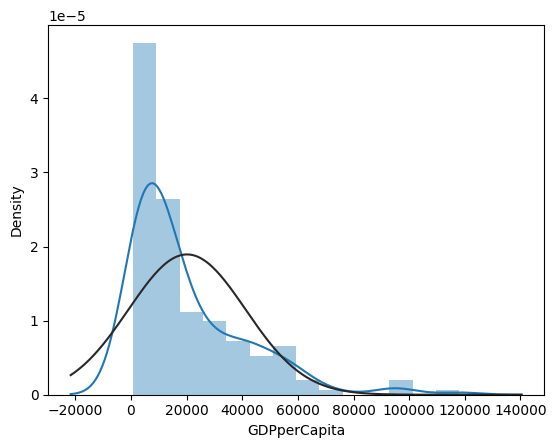

In [9]:
sns.distplot(df.GDPperCapita.dropna(), fit=stats.norm) 

In [7]:
print('Skewness: {:.4f}'.format(df['GDPperCapita'].dropna().skew()))
print('Kurtosis: {:.4f}'.format(df['GDPperCapita'].dropna().kurt()))
print('Quartile Deviation: {:.4f}'.format((df['GDPperCapita'].dropna().quantile(0.75) - df['GDPperCapita'].dropna().quantile(0.25))/2))
print('Decile Ratio: {:.4f}'.format(df['GDPperCapita'].dropna().quantile(0.9)/df['GDPperCapita'].dropna().quantile(0.1)))

Skewness: 1.7591
Kurtosis: 3.6312
Quartile Deviation: 12571.1935
Decile Ratio: 21.2360


In [8]:
stats.kstest(df.GDPperCapita.dropna(), 'norm', args=(df.GDPperCapita.dropna().mean(), df.GDPperCapita.dropna().std()))

KstestResult(statistic=0.1868161747950276, pvalue=5.285102924976525e-06, statistic_location=15046.922, statistic_sign=1)

Зависимая переменная "GDPperCapita" (ВВП на душу населения) как видно, не распределена нормально и демонстрируют значительную асимметрию и эксцесс:

Смещение (положительное) 1,7591 говорит о том, что распределение асимметрично и имеет длинный правый хвост. 

Эксцесс 3,6312 говорит о том, что распределение более остроконечное по сравнению с нормальным распределением и имеет более тяжёлые хвосты. 

Квартильное отклонение 12 571,1935 показывает размах между первым и третьим квартилями, что характеризует большой разброс серединных 50% значений относительно медианы.

Децильное соотношение 21,2360 показывает отношение 90-го процентиля к 10-му процентилю. Это число значительно выше 1, что указывает на то, что значения на верхнем конце распределения в более чем 21 раз больше, чем значения на нижнем конце. Это свидетельствует о значительных различиях ВВП между разными странами.

Результаты теста Колмогорова-Смирнова указывают на то, что распределение значительно отличается от нормального распределения (исходя из низкого p-value).

# Выберите не менее 8-ми метрических переменных и 2-ух категориальных переменных в качестве независимых.

## Дамми-переменные

In [11]:
development_dummies=pd.get_dummies(df.Development, prefix='Development', prefix_sep='_', dtype=int)
region_dummies=pd.get_dummies(df.Region, prefix='Region', prefix_sep='_', dtype=int)
income_dummies = pd.get_dummies(df.Income, prefix='Income', prefix_sep='_', dtype=int)


In [12]:
# Объединим в общую таблицу
df = pd.concat([df, development_dummies, region_dummies, income_dummies], axis=1) 

## Общая корреляция

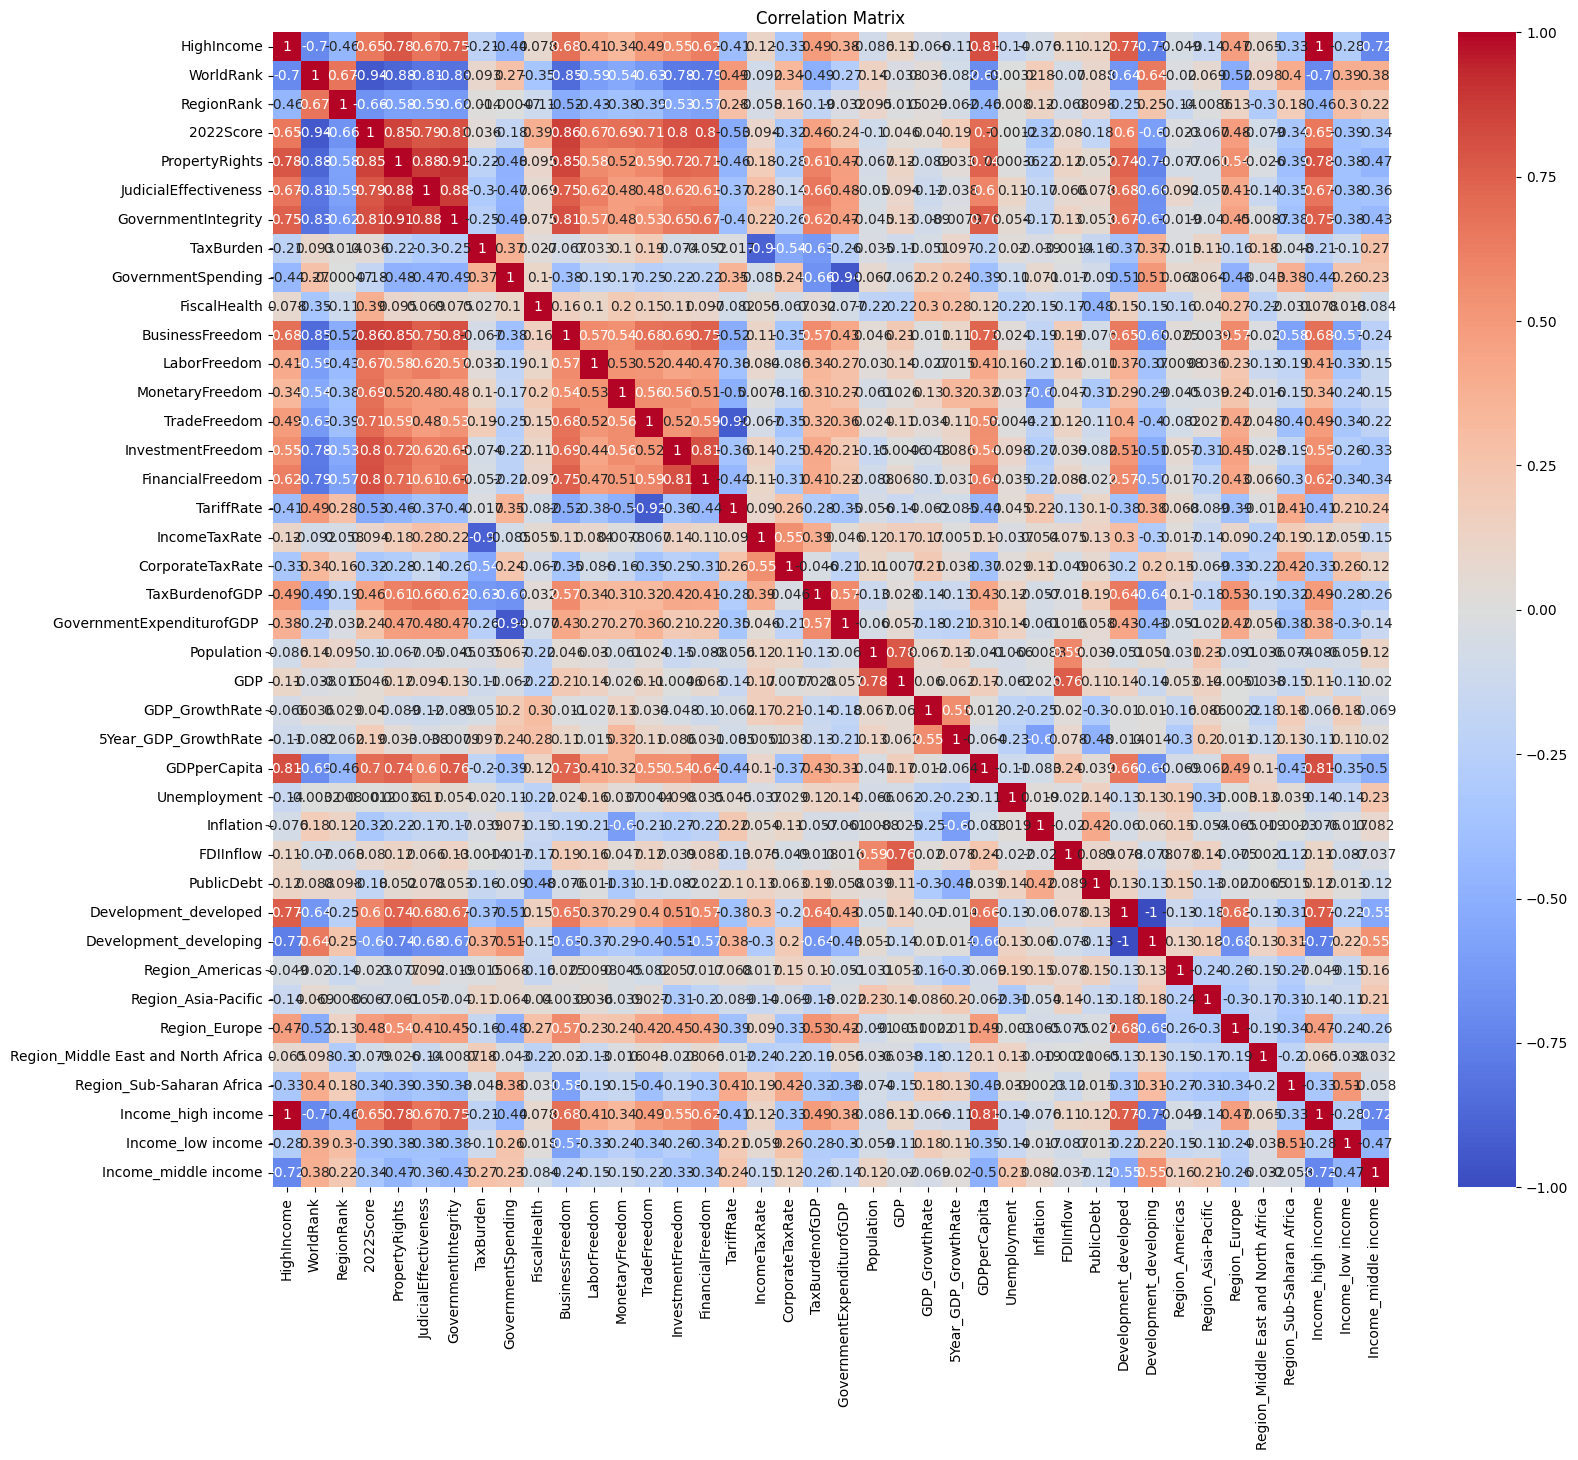

In [14]:
# Строим общую матрицу корреляций
correlation_matrix = df.corr(numeric_only = True)
plt.figure(figsize=(18,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Корреляция с зависимой переменной

In [15]:
# Смотрим корреляцию с зависимой переменной
target_corr = correlation_matrix["GDPperCapita"].sort_values(ascending=False)
print(target_corr)

GDPperCapita                           1.000000
Income_high income                     0.812656
HighIncome                             0.812656
GovernmentIntegrity                    0.762242
PropertyRights                         0.737042
BusinessFreedom                        0.728223
2022Score                              0.702673
Development_developed                  0.661816
FinancialFreedom                       0.636446
JudicialEffectiveness                  0.597709
TradeFreedom                           0.551054
InvestmentFreedom                      0.542410
Region_Europe                          0.489928
TaxBurdenofGDP                         0.425449
LaborFreedom                           0.409280
MonetaryFreedom                        0.322434
GovernmentExpenditurofGDP              0.312846
FDIInflow                              0.238650
GDP                                    0.171290
FiscalHealth                           0.123133
IncomeTaxRate                          0

Описание полученных значений коэффициентов корреляции:

HighIncome (Принадлежность к группе стран с высоким уровнем дохода) — 0,812656: сильная положительная корреляция указывает на то, что уровень дохода тесно связан с ВВП на душу населения;

GovernmentIntegrity (Неподкупность правительства) - 0,762242: высокая положительная корреляция показывает, что уровень коррупции значительно влияет на ВВП на душу населения;

PropertyRights (Имущественные права) - 0,737042: выражает сильную положительную корреляцию, подчеркивая значимость защиты прав собственности для экономического роста и процветания;

BusinessFreedom (Свобода ведения бизнеса) - 0,728223: коэффициент говорит о том, что свобода бизнеса, имеет значительное влияние на ВВП на душу населения;

2022Score (Оценка в 2022 году) - 0,702673: показатель тесно связан с размером ВВП на душу населения;

Development_developed (Принадлежность к развитым странам) - 0,661816: сильная положительная корреляция. Страны, которые классифицируются как развитые, обычно имеют более высокий ВВП на душу населения.

FinancialFreedom (Финансовая свобода) — 0,636446: указывает на умеренно сильную положительную корреляцию, что означает, что свобода в финансовом секторе играет важную роль в увеличении ВВП;

JudicialEffectiveness (Эффективность судебной системы) — 0,597709: показывает умеренную положительную корреляцию, отражая важность эффективной судебной системы для уровня ВВП.

TradeFreedom (Свобота торговли) - 0,551054: коэффициент корреляции указывает на умеренно сильную положительную связь между свободой торговли и ВВП на душу населения. 

InvestmentFreedom (Свобода инвестиций) - 0,542410: коэффициент также указывает на умеренно сильную положительную корреляцию, которая свидетельствует о том, что свобода инвестиций значительно влияет на экономическое развитие страны.

Region_Europe (Европейская страна) - 0,489928): умеренная положительная корреляция. Страны Европы, в среднем, имеют более высокий ВВП на душу населения по сравнению с другими регионами.

TaxBurdenofGDP (Налоговая нагрузка, % от ВВП) - 0,425449: слабая положительная корреляция (Изменение налоговой нагрузки на ВВП связано с ростом ВВП на душу населения). 

LaborFreedom (Свобода труда) - 0,409280: слабая положительная корреляция (Свободный рынок труда связан с небольшим увеличением ВВП на душу населения).

MonetaryFreedom (Денежная свобода) - 0,322434: слабая положительная корреляция. Свобода денежной политики имеет слабое положительное влияние на ВВП на душу населения.

GovernmentExpenditurofGDP (Государственные расходы в процентах от ВВП) - 0,312846: слабая положительная корреляция. Правительственные расходы относительно ВВП оказывают слабое положительное влияние на экономику.

Остальные коэффициенты корреляции слишком низкие, рассматривать их мы не будем, так как они оказывают слабое влияние на выбранный зависимый показатель

# Проведите факторный анализ с использованием независимых метрических переменных.

*<i> Мы провели три попытки получить результаты для множественной регрессии. Рассмотрим их далее. </b>

### <b> <span style='color:Red'> 1 попытка. PCA для сильно коррелирующих переменных. (не очень удачный) </span> </b>

#### Возьмем наиболее коррелирующие переменные (9 метрических), чтобы "собрать" их главный компонент

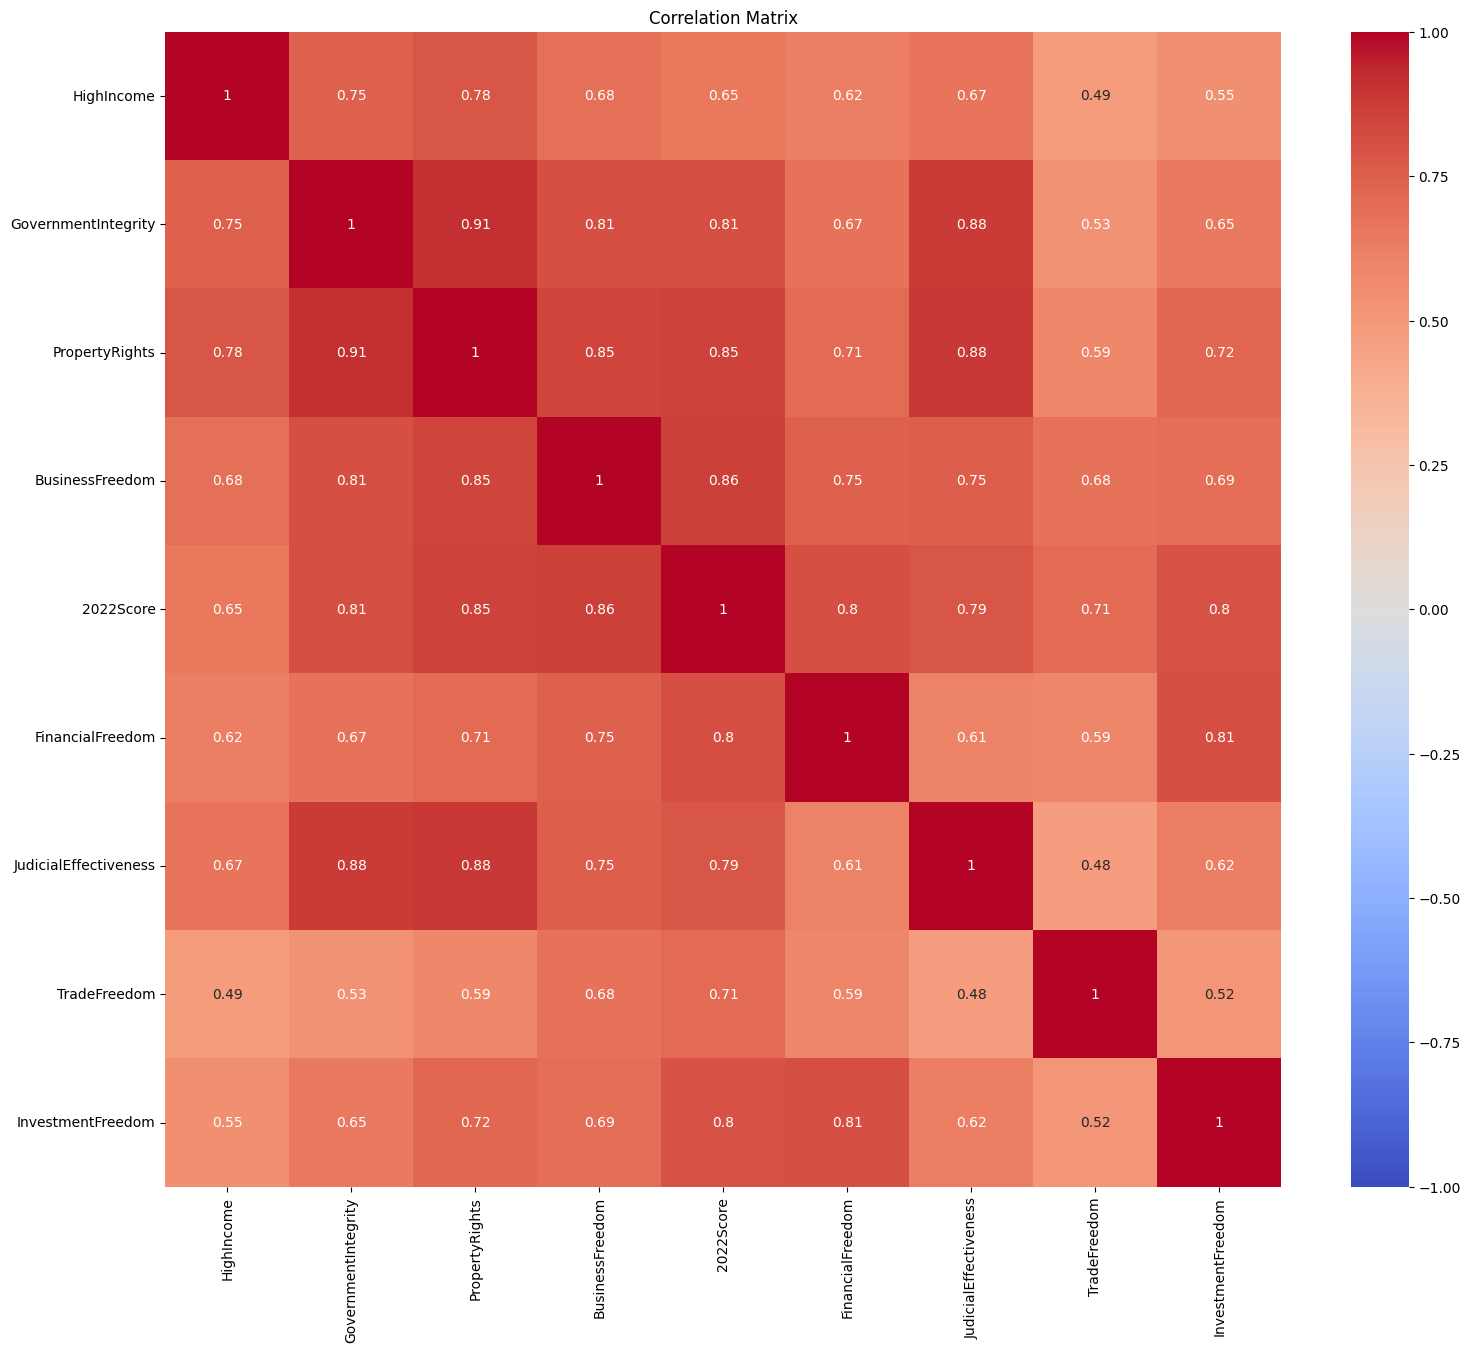

In [17]:
important_features_PCA = ['HighIncome', 'GovernmentIntegrity', 'PropertyRights', 'BusinessFreedom', 
                      '2022Score', 'FinancialFreedom', 'JudicialEffectiveness', 
                      'TradeFreedom', 'InvestmentFreedom']

correlation_matrix_important_PCA = df[important_features_PCA].corr()

plt.figure(figsize=(18,15))
sns.heatmap(correlation_matrix_important_PCA, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

#### Попробуем через метод главных компонент объединить сильно коррелирующие признаки

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Масштабируем признаки
scaler = StandardScaler()
df_cleaned_PCA = df[important_features_PCA].dropna()
scaled_data_PCA = scaler.fit_transform(df_cleaned_PCA)

pca = PCA(n_components=3) # Попробуем выделить 3 компонента
pca_factors = pca.fit_transform(scaled_data_PCA)

pca_components = pd.DataFrame(pca.components_, columns=important_features_PCA, index=['PCA_1', 'PCA_2', 'PCA_3'])

explained_variance = pca.explained_variance_ratio_
print('Доля объясненной дисперсии каждым фактором:', explained_variance)


Доля объясненной дисперсии каждым фактором: [0.74619076 0.08089444 0.05887729]


In [20]:
pca_components

HighIncome  GovernmentIntegrity  PropertyRights  BusinessFreedom  \
PCA_1    0.307693             0.350681        0.364326         0.352725   
PCA_2   -0.331472            -0.342009       -0.250679         0.059055   
PCA_3    0.148638             0.043393        0.025342         0.147277   

       2022Score  FinancialFreedom  JudicialEffectiveness  TradeFreedom  \
PCA_1   0.362877          0.325841               0.334839      0.273832   
PCA_2   0.168419          0.351848              -0.397349      0.543243   
PCA_3  -0.020410         -0.377267              -0.004726      0.696175   

       InvestmentFreedom  
PCA_1           0.316618  
PCA_2           0.318854  
PCA_3          -0.571193

<b> PCA_1 : </b> имеет высокие положительные коэффициенты для переменных GovernmentIntegrity, PropertyRights, BusinessFreedom, 2022Score, и FinancialFreedom, получается, что эти показатели взаимосвязаны и вместе влияют на ВВП каждого государства. Можно дать ему название <b> "Права и свобода в экономике". </b>

<b> PCA_2 : </b> имеет сильные отрицательные коэффициенты для переменных GovernmentIntegrity и JudicialEffectiveness, а также высокие положительные коэффициенты для переменных TradeFreedom и InvestmentFreedom. Возможно, это указывает на тенденцию, при которой страны с высоким уровнем торговой и инвестиционной свободы могут иметь более низкие показатели в области коррупции госсулжащих и эффективности судебной системы. Можно дать ему название <b> "Динамичность рынка". </b>

<b> PCA_3 : </b> имеет высокое положительное значение у переменной TradeFreedom (указывая на его значимость как отдельной меры в третьей компоненте), а также высокое отрицательное значение переменной InvestmentFreedom, что подчеркивает контраст между торговой свободой и инвестиционными ограничениями. Можно дать именно такое название <b> "Торгово-инвестиционный контраст".</b>

#### Формируем итоговый датасет с полученными компонентами и категориальными переменными.

In [22]:
pca_df = pd.DataFrame(pca_factors, columns=['PCA_1', 'PCA_2', 'PCA_3'])
final_df_PCA = pd.concat([pca_df, df[list(development_dummies.columns) + list(region_dummies.columns) + list(income_dummies.columns) + ["GDPperCapita"]]], axis=1)
final_df_PCA = final_df_PCA.dropna()

#### Объединим дамми-переменные по регионам. Вместо пяти получим 3

In [23]:
# Объединяем дамми-переменные
# Создаем новую колонку для Западных регионов
final_df_PCA['Western_Regions'] = final_df_PCA['Region_Americas'] + final_df_PCA['Region_Europe']
final_df_PCA['Western_Regions'] = final_df_PCA['Western_Regions'].apply(lambda x: 1 if x > 0 else 0)

# Создаем новую колонку для Восточных регионов
final_df_PCA['Eastern_Regions'] = final_df_PCA['Region_Asia-Pacific'] + final_df_PCA['Region_Middle East and North Africa']
final_df_PCA['Eastern_Regions'] = final_df_PCA['Eastern_Regions'].apply(lambda x: 1 if x > 0 else 0)

# Колонка для Африки останется такой же
final_df_PCA['Africa'] = final_df_PCA['Region_Sub-Saharan Africa']

# Удаляем старые колонки
final_df_PCA = final_df_PCA.drop(columns=['Region_Americas', 'Region_Asia-Pacific', 'Region_Europe', 
                      'Region_Middle East and North Africa', 'Region_Sub-Saharan Africa'])

#### В качетсве референтных групп возьмем Western_Regions, Income_high income и Development_developed

In [24]:
final_df_PCA = final_df_PCA.drop(columns=["Income_high income", "Western_Regions", "Development_developed"])

В рамках данной модели можно выдвинуть следующие <b> гипотезы: </b>
1) На переменную "ВВП на душу население" в наибольшей степени будет влиять PCA_1 (Права и свобода в экономике);
2) Переменная PCA_1 (Права и свобода в экономике) будет статистически значимой;
3) На переменную "ВВП на душу население" в чуть меньшей степени, чем PCA_1, будет влиять PCA_2 (Динамичность рынка);
4) Переменная PCA_2 (Динамичность рынка) будет статистически значимой;
5) На переменную "ВВП на душу население" примерно в такой же степени, как и PCA_2, будет влиять PCA_3 (Торгово-инвестиционный контраст);
6) Переменная PCA_3 (Торгово-инвестиционный контраст) будет статистически значимой;
7) Страны, которые относятся к среднедоходным и низкодоходным, влияют на ВВП меньше, чем высокодоходные страны;
8) Категориальная переменная income будет статистически значимой;
9) Принадлежность к странам, находящимся в восточном регионе и Африке, в меньшей степени влияет на ВВП, чем принадлежность к странам западного региона;
10) Категориальная переменная region будет статистически значимой;
11) Принадлженость к развитым страны в большей степени влияет на ВВП, чем принадлежность к развивающимся странам;
12) Категориальная переменная development будет статистически значимой;


### <span style='color:Red'> Вторая гипотеза сформулирована некорректно. Правильно: Существует статистически значимая взаимосвязь между ВВП на душу и индикатором "Права и свободы в экономике". Аналогично с 4-ой гипотезой.
    
### <span style='color:Red'> Формулировка третьей гипотезы тоже не совсем корректная. Что значит чуть в меньшей степени? Можно было бы написать, что она будет второй по силе влияния. Аналогично с 5-ой гипотезой.
    
### <span style='color:Red'> 7-ая гипотеза некорректна, что значит "страны влияют"? Правильно: в странах, относящихся к группе высокодоходных, ВВП в среднем выше, чем в других. Восьмую надо было по аналогии сформулировать.

### <span style='color:Red'> С регионами формулировка также некорректна. Влияет не принадлежность, а в разных регионах различаются ВВП по сравнению с референтной группой.
    
### <span style='color:Red'> Есть шаблон формулировки гипотез, рекомендую его придерживаться. От него можно отходить, но со знанием дела, а не хаотично. Для метрических: существует взаимосвязь между X и Y. Для категориальных: значения Y отличаются между группами.

#### Строим модель по полученным трем главным компонентам и трем категориальным предикторам

In [25]:
x_mult_PCA = sm.add_constant(final_df_PCA.drop(columns=['GDPperCapita']))
y_PCA = final_df_PCA['GDPperCapita']
x_mult_constant_PCA = sm.add_constant(x_mult_PCA)
model_PCA = sm.OLS(y_PCA, x_mult_constant_PCA).fit()
print(model_PCA.summary())

                            OLS Regression Results                            
Dep. Variable:           GDPperCapita   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     44.48
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           4.13e-37
Time:                        15:50:18   Log-Likelihood:                -1846.2
No. Observations:                 171   AIC:                             3710.
Df Residuals:                     162   BIC:                             3739.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4.80

#### Уравнение регрессии. Оценка характеристик регрессионной модели.

In [26]:
l = []
for (param, index) in zip(model_PCA.params[1:], model_PCA.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))
    
print('Y = {:2f} + {}'.format(model_PCA.params[0], ' + '.join(l)))

Y = 48035.474702 + -171.70*PCA_1 + 138.10*PCA_2 + -138.06*PCA_3 + -5921.58*Development_developing + -34830.28*Income_low income + -29983.38*Income_middle income + 718.51*Eastern_Regions + -5948.21*Africa


Полученное уравнение линейной регрессии:

Y = 48035.474702 - 171.70\*PCA_1 + 138.10\*PCA_2 - 138.06\*PCA_3 - 5921.58\*Development_developing - 34830.28\*Income_low income - 29983.38\*Income_middle income + 718.51\*Eastern_Regions - 5948.21\*Africa


In [27]:
print('R^2 = {:f}'.format(model_PCA.rsquared))
print('F-test significance = {:f}'.format(model_PCA.f_pvalue))

R^2 = 0.687186
F-test significance = 0.000000


Значение R^2 = 0,687 означает, что 68.7% данных, влиющих на GDPperCapita, объясняется моделью. Получается, что модель объясняет большую часть данных.

Рассмотрим общие характеристики модели:

<b> R-squared = 0,687 </b> 
Примерно 68.7% изменчивости ВВП на душу населения объясняется моделью. Это высокий показатель, который указывает на то, что модель эффективно захватывает зависимости в данных.

<b> Adj. R-squared = 0,672 </b>
Скорректированный коэффициент детерминации также высок, что подтверждает адекватность модели с учетом количества включенных предикторов.

<b> F-statistic = 44,48 и Prob (F-statistic) = 4.13e-37 </b>
Очень низкое p-значение F-статистики говорит о том, что модель статистически значима.

In [28]:
p = stats.kstest(model_PCA.resid, 'norm', args=(model_PCA.resid.mean(), model_PCA.resid.std())).pvalue
print('P-value: {:.4f}'.format(p))

P-value: 0.0002


Из теста Колмагорова-Смирнова видно (по значению p-val), что статки модели не являются нормально распределёнными.

<Axes: ylabel='Density'>

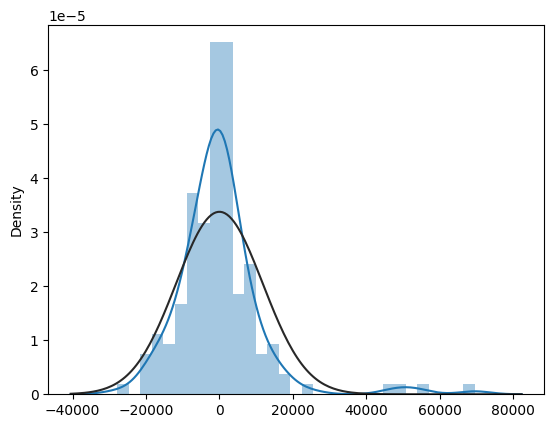

In [69]:
sns.distplot(model_PCA.resid, fit=stats.norm) 

По графику распределения остатков мы видим, что оно похоже на нормальное в центре, однако имеет несимметричные хвосты. Основной пик распределения сосредоточен около нуля, что хорошо, так как это указывает на отсутствие смещения в модели.

При этом на графике наблюдаются выбросы, которые находятся далеко от центра распределения, как в положительной, так и в отрицательной области.

Также график показывает наличие асимметрии в распределении остатков, с легким перекосом вправо.

In [38]:
hover_texts = ['Country name: {}'.format(id_val) for id_val in df['CountryName']]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=model_PCA.fittedvalues, 
    y=model_PCA.resid,
    mode='markers',
    marker=dict(color='lightgreen', size=10, line=dict(color='black', width=1)),
    text=hover_texts,
    hoverinfo='text+x+y'
))
fig.update_layout(
    title='Гетероскедастичность',
    xaxis_title='Fitted value',
    yaxis_title='Residual',
    template='plotly_white',
    xaxis=dict(showgrid=True, zeroline=True, zerolinewidth=1, zerolinecolor='grey'),
    yaxis=dict(showgrid=True, zeroline=True, zerolinewidth=1, zerolinecolor='grey'),
    plot_bgcolor='white'
)

fig.show()

По графику гетероскедастичности видно, что  остатки группируются вокруг нуля при низких предсказанных значениях и демонстрируют увеличивающуюся дисперсию при увеличении этих значений. Это признак гетероскедастичности.

Помимо этого справа вверху мы видим отдельные точки, которые свидетельствуют о наличии выбросов. Можно навести на график и увидеть, что именно это за страны, например, самая дальняя правая точка - Лесото, Африканское государство.

In [19]:
vifs = np.array([vif(model_PCA.model.exog, i) for i in range(model_PCA.model.exog.shape[1])])

In [20]:
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model_PCA.params.index[1:]
vif_df.sort_values(by=['VIF'])

VIF                Features
2  1.007405                   PCA_3
0  1.018587                   PCA_1
1  1.022406                   PCA_2
6  1.424831         Eastern_Regions
7  1.951486                  Africa
4  2.647653       Income_low income
3  2.799920  Development_developing
5  2.991044    Income_middle income

По полученным значениям VIF можно сделать вывод:

PCA_3, PCA_1, PCA_2 - значения VIF очень близки к 1, что указывает на отсутствие мультиколлинеарности среди этих признаков. Получается, что главные компоненты PCA были успешно использованы для устранения мультиколлинеарности между исходными переменными.

Eastern_Regions, Africa - значения VIF немного выше 1. Даннные значения указывают на незначительную мультиколлинеарность, которая не должна существенно повлиять на надёжность модели.

Income_low income, Development_developing, Income_middle income - данные признаки имеют значения VIF от 2.647653 до 2.991044 (ниже общепринятого порога), и указывают на умеренную мультиколлинеарность. 

#### Оценка значимости регрессионных коэффициентов.

In [17]:
f'Статистически значимые параметры модели: {model_PCA.pvalues[model_PCA.pvalues < 0.05].index.values}'

"Статистически значимые параметры модели: ['const' 'Income_low income' 'Income_middle income' 'Africa']"

In [18]:
f'Статистически не значимые параметры модели: {model_PCA.pvalues[model_PCA.pvalues > 0.05].index.values}'

"Статистически не значимые параметры модели: ['PCA_1' 'PCA_2' 'PCA_3' 'Development_developing' 'Eastern_Regions']"

Как мы видим, получанные нами главные компоненты являются статистически не значимыми, а вот выделенные нами дамми-переменные, отражающие принадлежность к страннам с различным уровнем дохода, являются значимыми. 

По полученным данным можно принять и отклонить выдвинутые гипотезы (отметим красным гипотезы, <span style='color:Red'> которые неподтвердились </span> и <span style='color:Green'> зеленым, которые подвердились </span> и <span style='color:Orange'> оранжевым, которые подвердились частично</span>)
1) <span style='color:Red'> На переменную "ВВП на душу население" в наибольшей степени будет влиять PCA_1 (Права и свобода в экономике) - как мы видим, есть более влияющие признаки, например development;
2) <span style='color:Red'> Переменная PCA_1 (Права и свобода в экономике) будет статистически значимой - p-val > 0,05, отклоняем;
3) <span style='color:Orange'> На переменную "ВВП на душу население" в чуть меньшей степени, чем PCA_1, будет влиять PCA_2 (Динамичность рынка) - PCA_2 имеет положительное влияние, а PCA_1 отрицательное. Если взять по модулю, то гипотеза подтверждается; 
4) <span style='color:Red'> Переменная PCA_2 (Динамичность рынка) будет статистически значимой - p-val > 0,05, отклоняем;
5) <span style='color:Orange'> На переменную "ВВП на душу население" примерно в такой же степени, как и PCA_2, будет влиять PCA_3 (Торгово-инвестиционный контраст). Очень близкие значения коэффициентов, только с разными знаками. Если взять по модулю, то подверждается;
6) <span style='color:Red'> Переменная PCA_3 (Торгово-инвестиционный контраст) будет статистически значимой - p-val > 0,05, отклоняем;
7) <span style='color:Green'> Страны, которые относятся к среднедоходным и низкодоходным, влияют на ВВП меньше, чем высокодоходные страны - подтверждается, так как обе переменные имеют отрицательный коэффициент;
8) <span style='color:Green'> Категориальная переменная income будет статистически значимой - p-val < 0,05, подтверждаем;
9) <span style='color:Orange'> Принадлежность к странам, находящимся в восточном регионе и Африке, в меньшей степени влияет на ВВП, чем принадлежность к странам западного региона - т.к. у Африки отрицательный коэффициент, то подтверждаем, а вот у восточного региона положительный, значит отрицаем. Получается частичное подтверждение;
10) <span style='color:Red'> Категориальная переменная region будет статистически значимой - p-val > 0,05, отклоняем;
11) <span style='color:Green'> Принадлежность к развитым странам в большей степени влияет на ВВП, чем принадлежность к развивающимся странам - принимаем, так как переменная имеет отрицательный коэффициент;
12) <span style='color:Red'> Категориальная переменная development будет статистически значимой - p-val > 0,05, отклоняем;

#### Проведите диагностику модели. Есть ли в модели выбросы и/или влияющие наблюдения, сколько их? Чем это может объясняться?

In [21]:
influence = model_PCA.get_influence()
inf_sum = influence.summary_frame()

In [22]:
inf_sum['dffits'][(inf_sum['dffits']>1) | (inf_sum['dffits']<-1)].sort_values()
#потенциальные влияющие наблюдения

176   -1.068286
99     1.183147
147    1.318650
134    1.370372
Name: dffits, dtype: float64

In [24]:
print(df.loc[[176, 147, 99, 134], 'CountryName'])

CountryID
176       Uruguay
147     Singapore
99     Luxembourg
134         Qatar
Name: CountryName, dtype: object


Как мы видим: Уругвай, Катар, Сингапур и Люксембург имеют значения DFFITS, превышающие 1. Это предполагает, что перечисленные страны могут оказывать значительное влияние на результаты построенной модели множественной регрессии.

In [23]:
inf_sum['standard_resid'][(inf_sum['standard_resid']>3) | (inf_sum['standard_resid']<-3)].sort_values()
#потенциальные выбросы

78     3.922104
134    4.359636
147    4.620329
99     5.828586
Name: standard_resid, dtype: float64

In [25]:
print(df.loc[[78, 134, 147, 99], 'CountryName'])

CountryID
78        Ireland
134         Qatar
147     Singapore
99     Luxembourg
Name: CountryName, dtype: object


Как мы видим: Ирландия, Катар, Сингапур и Люксембург имеют значения стандартизированных остатков, превышающие 3. Это предполагает, что перечисленные страны относятся к выбросам.

Для улучшения данной модели можно попробовать в дальнейшем удалить наблюдения, относящиеся к потенциальным выбросам и потенциально влиящим наблюдениям

#### Интерпритация взаимосвязи между каждым из предикторов и зависимой переменной.

<b> Первый показатель (константа) </b> объясняет, что. в среднем, ВВП на душу населения будет равно 48 035,47$, если все предикторы равны нулю.

<b> PCA_1 </b> равен -171,70 это говорит о том, что уменьшение на одну единицу в первой главной компоненте уменьшает ВВП на душу населения, в среднем, на 171,70$. Важно помнить, что данный показатель не является статистически значимым.

<b> PCA_2 </b> равен 138,10 это говорит о том, что увеличение на одну единицу во второй главной компоненте увеличивает ВВП на душу населения, в среднем, на 138,10$. Это показывает положительное влияние факторов, сведенных во вторую компоненту. Важно помнить, что данный показатель не является статистически значимым.

<b> PCA_3 </b> равен -138,06 это говорит о том, что уменьшение на одну единицу в третьей главной компоненте уменьшает ВВП, в среднем, на 138,06$, что указывает на отрицательное воздействие составляющих этой компоненты. Важно помнить, что данный показатель не является статистически значимым.
Можно заметить схожесть коэффицинтов PCA_2 и PCA_3. 

<br> --------------------------------------------------------------
<br> Напомним, что в качестве референтных групп были выбраны Western_Regions, Income_high income и Development_developed. А значит переменные, имеющие отношение к одной категории, мы должны анализировать в комплексе.

<b> Development_developing </b> равен -5921,58, это говорит о том, что в среднем, в развитых странах ВВП на душу населения выше, чем в развивающихся странах, на 5921,58$. Важно помнить, что данный показатель не является статистически значимым.

<b> Income_low income </b> равен -34830,28$. Можно сказать, что в среднем, страны с низким уровнем дохода имеют на 34830,28$ меньше ВВП на душу населения по сравнению со странами высокого уровня дохода.
<b> Income_middle income </b> равен -29983,38$. Можно сказать, что в среднем, в странах со среднем уровнем дохода ВВП на душу населения меньше на 34830,28$, чем в странах с высоким уровнем дохода.

<b> Eastern_Regions </b> равен 718,51. Это свидетельсвует о том, что в странах, относящихся к восточным регионам, в среднем, ВВП на душу населения выше на 718,51$, чем в странах, относящихся к западным регионам. Важно помнить, что данный показатель не является статистически значимым.
<b> Africa </b> равен -5948,21. Это свидетельсвует о том, что в странах, относящихся к Африке ВВП на душу населения, в среднем, ниже на 718,51$, чем в странах, относящихся к западным регионам.

### <span style='color:Red'> Можно не тратить время на интерпретацию статистически незначимых коэффициентов.

#### Кросс-валидация

Изучив подребнее библиотеку statsmodels было выявлено, что встроенных методов кросс-валидации в ней нет. 
Поэтому воспользуемся делением на фолды (это подгруппы данных, на которые разбивается весь датасет для проведения оценки модели) через библиотеку sklearn и в ручном режими рассчитаем R^2

In [73]:
X = final_df_PCA.drop(columns=['GDPperCapita'])
y = final_df_PCA['GDPperCapita']

# Разобьем на 5 фолдов
kf = KFold(n_splits=5, shuffle=True, random_state=1)

r_squared = []

for train_index, test_index in kf.split(X):
    # Делим на обучающую и тестовую выборку
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Добавляем константу
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)

    # Тренируем модельку
    model = sm.OLS(y_train, X_train_const).fit()

    # Оцениваем тестовой выборке
    y_pred = model.predict(X_test_const)
    ss_res = np.sum((y_test - y_pred) ** 2)
    ss_tot = np.sum((y_test - np.mean(y_train)) ** 2)
    r_squared_value = 1 - (ss_res / ss_tot)
    
    r_squared.append(r_squared_value)

# Считаем средний R^2 по всем фолдам
mean_r_squared = np.mean(r_squared)
print(f"Средний R^2 по фолдам: {mean_r_squared:.4f}")

Средний R^2 по фолдам: 0.6291


Средний R² по полученной модели составил 0.6291. Это означает, что модель в среднем объясняет примерно 62.91% спрогнозированных данных ВВП на душу населения на различных подвыборках данных.

#### Сформулируйте общие содержательные выводы по результатам регрессионного анализа данных. Какие результаты анализа данных для вас оказались очевидными, а какие неожиданными?

В общем можно отметить, что модель может справится с поставленной задачей, но вряд ли полученные результаты будут достаточно точными. 

Применив метод главных компонент мы думали, что полученные главные компоненты будут самыми важными компонентами в модели и окажутся статистически значимыми. Однако, наша догадка не подтвердилась, все полученные главные компоненты оказались статистически не значимыми.

Также мы думали, что страны, относящиеся к западным регионам, имеют ВВП выше, чем любые другие страны, но в ходе регрессионного анализа мы выявили, что страны, относящиеся к восточным регионам, в среднем, имееют более высокий ВВП на душу населения.

Нас очень расстроил результат применения метода главных компонент, поэтому мы решили попробовать провести еще и факторный анализ.

#### Мем, чтобы отвлечься от продолжительной работы

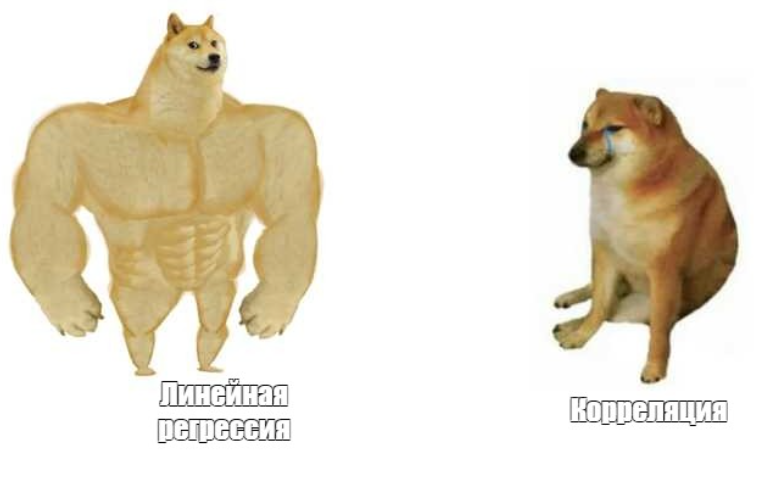

### <b> <span style='color:Green'> 2 попытка. Факторный анализ для сильно коррелирующих переменных. (хороший результат)</span> </b>

#### КМО

In [39]:
# Составляем список сильно коррелирующих переменных между собой, чтобы разделить их на факторы
corr_features_fact_1 = ['HighIncome', 'GovernmentIntegrity', 'PropertyRights', 'BusinessFreedom', 
                      '2022Score', 'FinancialFreedom', 'JudicialEffectiveness', 
                      'TradeFreedom', 'InvestmentFreedom']

df_corr_cleaned_fact_1 = df[corr_features_fact_1].dropna()

In [40]:
_, kmo_model = calculate_kmo(df_corr_cleaned_fact_1)
kmo_model #KMO

0.9200862412065934

Получаем очень высокий КМО, который говорит об отличной возможности для проведения факторного анализа

#### Определяем количество факторов

In [41]:
fa1 = FactorAnalyzer(n_factors=len(corr_features_fact_1), rotation='varimax', method='principal') 
fa1.fit(df_corr_cleaned_fact_1)
print(f"Строим факторную модель для {len(corr_features_fact_1)} факторов, что соответствует общему числу независемых метрических переменных")

Строим факторную модель для 9 факторов, что соответствует общему числу независемых метрических переменных


In [42]:
ev, v = fa1.get_eigenvalues()
len_ev = len(ev[ev > 1])
print(ev[ev > 1])
print(f"{len_ev} собственных значений выше 1, значит нужно оставить {len_ev}  факторов")

[6.71571688]
1 собственных значений выше 1, значит нужно оставить 1  факторов


In [43]:
fa1 = FactorAnalyzer(n_factors=len_ev, rotation='varimax', method='principal') 
fa1.fit(df_corr_cleaned_fact_1)

FactorAnalyzer(method='principal', n_factors=1, rotation='varimax',
               rotation_kwargs={})

#### Описываем полученные факторы

In [44]:
facts = []
for i in range(len_ev):
    facts.append(f"Factor_{i+1}")
factors1 = pd.DataFrame(data=fa1.loadings_, 
                       index=df_corr_cleaned_fact_1.columns, 
                       columns=facts)
factors1

Factor_1
HighIncome            -0.797376
GovernmentIntegrity   -0.908780
PropertyRights        -0.944139
BusinessFreedom       -0.914075
2022Score             -0.940384
FinancialFreedom      -0.844408
JudicialEffectiveness -0.867724
TradeFreedom          -0.709628
InvestmentFreedom     -0.820506

<b> Factor_1  "Регуляторные ограничения" </b>

<b> Обоснование наименования: </b> На основе полученных значений видно, что все признаки имеют отрицательные коэффициенты загрузки на первый фактор. Все они связаны с экономической свободой и качеством управления, что отражает некоторую форму "Регуляторных ограничений".

#### Процент вариации исходных переменных, объясненной факторной моделью

In [45]:
cumulative_variances = fa1.get_factor_variance()[2]
factor_variance = pd.DataFrame(data=fa1.get_factor_variance()[1:3],
                              index=['Proportional variance', 'Cumulative variance'],
                              columns=factors1.columns)
factor_variance

Factor_1
Proportional variance  0.746191
Cumulative variance    0.746191

Накопленная вариация показывает, что <b> выявленный фактор ("Регуляторные ограничения") объясняет 74.62% общей вариации всех переменных </b>, что указывает на значимость фактора в структуре данных

In [46]:
transformed = pd.DataFrame(data=fa1.transform(df_corr_cleaned_fact_1),
                           index=df_corr_cleaned_fact_1.index,
                           columns=factors1.columns)

#### Формируем итоговый датасет с полученными факторами, категориальными переменными и дополнительными метрическими переменными

In [47]:
df_additional_fact_1 = pd.concat([df[['Income_high income', 'Income_low income', 'Income_middle income', # Дамми по категориальной "income"
 'Region_Americas', 'Region_Asia-Pacific', 'Region_Europe', 'Region_Middle East and North Africa', 'Region_Sub-Saharan Africa', # Дамми по категориальной "region"
 "GDPperCapita", # Таргет
 'TaxBurdenofGDP', 'LaborFreedom', 'MonetaryFreedom']],  # Введем дополнительные метрические переменные, немного коррелирующие с таргетом
 transformed], 
 axis=1)

#### Объеденим дамми-переменные по регионам. Вместо пяти получим 3

In [48]:
# Объединяем дамми-переменные
# Создаем новую колонку для Западных регионов
df_additional_fact_1['Western_Regions'] = df_additional_fact_1['Region_Americas'] + df_additional_fact_1['Region_Europe']
df_additional_fact_1['Western_Regions'] = df_additional_fact_1['Western_Regions'].apply(lambda x: 1 if x > 0 else 0)

# Создаем новую колонку для Восточных регионов
df_additional_fact_1['Eastern_Regions'] = df_additional_fact_1['Region_Asia-Pacific'] + df_additional_fact_1['Region_Middle East and North Africa']
df_additional_fact_1['Eastern_Regions'] = df_additional_fact_1['Eastern_Regions'].apply(lambda x: 1 if x > 0 else 0)

# Колонка для Африки останется такой же
df_additional_fact_1['Africa'] = df_additional_fact_1['Region_Sub-Saharan Africa']

# Удаляем старые колонки
df_additional_fact_1 = df_additional_fact_1.drop(columns=['Region_Americas', 'Region_Asia-Pacific', 'Region_Europe', 
                      'Region_Middle East and North Africa', 'Region_Sub-Saharan Africa'])

#### В качетсве референтных групп возьмем Western_Regions, Income_high income

In [49]:
col_without_referent_and_target = list(df_additional_fact_1.columns)
col_without_referent_and_target.remove("Western_Regions")
col_without_referent_and_target.remove("Income_high income")
col_without_referent_and_target.remove("GDPperCapita")

In [50]:
df_additional_fact_1 = df_additional_fact_1.dropna()

В рамках данной модели можно выдвинуть следующие <b> гипотезы: </b>
1) На переменную "ВВП на душу население" в наибольшей степени будет влиять Factor_1 (Регуляторные ограничения);
2) Переменная Factor_1 (Регуляторные ограничения) будет статистически значимой;
3) Метрическая переменная TaxBurdenofGDP будет оказывать существенное влияние на ВВП на душу населения;
4) Метрическая переменная TaxBurdenofGDP будет статистически значимой;
5) Метрическая переменная LaborFreedom будет оказывать существенное влияние на ВВП на душу населения; 
6) Метрическая переменная LaborFreedom будет статистически значимой;
7) Метрическая переменная MonetaryFreedom будет оказывать существенное влияние на ВВП на душу населения;
8) Метрическая переменная MonetaryFreedom будет статистически значимой;
9) Страны, которые относятся к среднедоходным и низкодоходным, влияют на ВВП меньше, чем высокодоходные страны;
10) Категориальная переменная income будет статистически значимой;
11) Принадлежность к странам, находящимся в восточном регионе и Африке, в меньшей степени влияет на ВВП, чем принадлежность к странам западного региона;
12) Категориальная переменная region будет статистически значимой;

#### Строим модель

In [51]:
x_mult_fact_1 = df_additional_fact_1[col_without_referent_and_target]
y_fact_1 = df_additional_fact_1['GDPperCapita']
x_mult_constant_fact_1 = sm.add_constant(x_mult_fact_1)
model_fact_1 = sm.OLS(y_fact_1, x_mult_constant_fact_1).fit()

#### Уравнение регрессии. Оценка характеристик регрессионной модели.

In [52]:
l = []
for (param, index) in zip(model_fact_1.params[1:], model_fact_1.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))
    
print('Y = {:2f} + {}'.format(model_fact_1.params[0], ' + '.join(l)))

Y = 54670.079374 + -22801.29*Income_low income + -22099.72*Income_middle income + -147.91*TaxBurdenofGDP + -56.66*LaborFreedom + -158.41*MonetaryFreedom + -10017.84*Factor_1 + 1623.18*Eastern_Regions + -4493.22*Africa


Получаем следующее уравнение множественной регрессии:

Y = 54670.079374 - 22801.29\*Income_low income - 22099.72\*Income_middle income - 147.91\*TaxBurdenofGDP - 56.66\*LaborFreedom - 158.41\*MonetaryFreedom - 10017.84\*Factor_1 + 1623.18\*Eastern_Regions - 4493.22\*Africa


In [53]:
print(model_fact_1.summary())

                            OLS Regression Results                            
Dep. Variable:           GDPperCapita   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     55.48
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           3.78e-43
Time:                        15:56:18   Log-Likelihood:                -1888.8
No. Observations:                 176   AIC:                             3796.
Df Residuals:                     167   BIC:                             3824.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5.467e+04 

In [54]:
from scipy.stats.mstats import zscore
print(sm.OLS(zscore(y_fact_1), zscore(x_mult_fact_1)).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:           GDPperCapita   R-squared (uncentered):                   0.727
Model:                            OLS   Adj. R-squared (uncentered):              0.714
Method:                 Least Squares   F-statistic:                              55.82
Date:                Sun, 13 Oct 2024   Prob (F-statistic):                    2.01e-43
Time:                        15:56:20   Log-Likelihood:                         -135.61
No. Observations:                 176   AIC:                                      287.2
Df Residuals:                     168   BIC:                                      312.6
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [55]:
print('R^2 = {:f}'.format(model_fact_1.rsquared))
print('F-test significance = {:f}'.format(model_fact_1.f_pvalue))

R^2 = 0.726616
F-test significance = 0.000000


Рассмотрим полученные характеристики модели:

<br><b> R-squared = 0,727 </b> 
Модель объясняет 72,7% вариации зависимой переменной (GDPperCapita). Это хороший показатель, указывающий на то, что модель эффективно захватывает информацию о зависимостях в данных.
<br><b> Adjusted R-squared = 0,714 </b> 
Скорректированный коэффициент детерминации также достаточно высок, что подтверждает адекватность модели даже после учета количества предикторов.
<br><b> F-statistic = 55.48 и Prob (F-statistic) = 3.78e-43 </b> 
 Статистика F очень высока, а p-значение близко к нулю, что говорит о том, что модель статистически значима на очень низком уровне ошибки.

In [56]:
p = stats.kstest(model_fact_1.resid, 'norm', args=(model_fact_1.resid.mean(), model_fact_1.resid.std())).pvalue
print('P-value: {:.4f}'.format(p))

P-value: 0.0056


Из теста Колмагорова-Смирнова видно (по значению p-val), что статки модели не являются нормально распределёнными.

<Axes: ylabel='Density'>

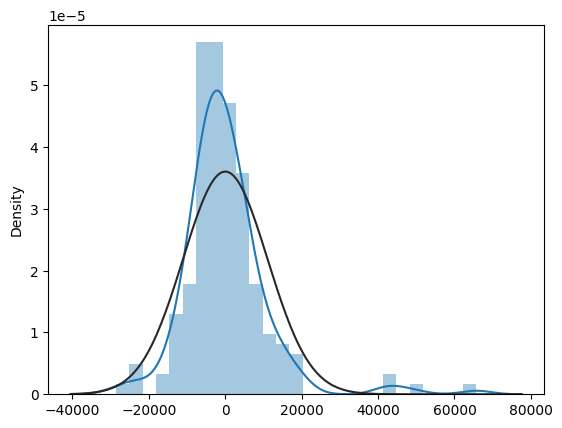

In [57]:
sns.distplot(model_fact_1.resid, fit=stats.norm) 

По графику распределения остатков видно, что отдельные столбцы находятся вне основного распределения, особенно справа от центра. Это указывает на наличие выбросов. В целом, распределение остатков имеет довольно широкие хвосты, что может свидетельствовать о более высокой дисперсии остатков, чем предполагает нормальное распределение. При этом видно, что большая часть остатков сосредоточена вокруг нуля, что является хорошим признаком.

In [60]:
hover_texts = ['Country name: {}'.format(id_val) for id_val in df['CountryName']]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=model_fact_1.fittedvalues, 
    y=model_fact_1.resid,
    mode='markers',
    marker=dict(color='coral', size=10, line=dict(color='black', width=1)),
    text=hover_texts,
    hoverinfo='text+x+y'
))
fig.update_layout(
    title='Гетероскедастичность',
    xaxis_title='Fitted value',
    yaxis_title='Residual',
    template='plotly_white',
    xaxis=dict(showgrid=True, zeroline=True, zerolinewidth=1, zerolinecolor='grey'),
    yaxis=dict(showgrid=True, zeroline=True, zerolinewidth=1, zerolinecolor='grey'),
    plot_bgcolor='white'
)

fig.show()

По графику гетероскедастичности можно скзаать, что дисперсия остатков увеличивается с ростом предсказанных значений, что является признаком гетероскедастичности. Помимо этого видны отдельные точки, сильно отклоняющиеся от общего распределения остатков (выбросы), особенно при высоких значениях предсказаний. Например, сильно выделяется, как и в прошлый раз Лисото, а также Парагвай, Иран и Саудовская Аравия

In [39]:
vifs = np.array([vif(model_fact_1.model.exog, i) for i in range(model_fact_1.model.exog.shape[1])])

In [40]:
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model_fact_1.params.index[1:]
vif_df.sort_values(by=['VIF'])

VIF              Features
6  1.540455       Eastern_Regions
4  1.629335       MonetaryFreedom
3  1.636610          LaborFreedom
2  1.787122        TaxBurdenofGDP
7  2.111203                Africa
1  3.684333  Income_middle income
0  3.715020     Income_low income
5  5.929432              Factor_1

Мы видим, что все полученные VIF значения ниже 10, что говорит об отсуствие мультиколлениарности. Рассмотрим немного подробнее:

<b> Africa (2,111203), TaxBurdenofGDP (1,787122), LaborFreedom (1,636610), MonetaryFreedom (1,629335) и Eastern_Regions (1,540455) </b>

Значения VIF  по данным переменным находятся в диапазоне от 1 до 2.11, что указывает на низкую мультиколлинеарность, что является хорошим признаком.

<b> Income_low income (3,715020) и Income_middle income (3,684333): </b>

Значения VIF для данных переменных выше 3, что указывает на возможную мультиколлинеарность, но значения ниже порогового (10).

<b> Factor_1 (5,929432): </b>

Значение VIF для Factor_1 (Регуляторные ограничения) превышает 5, что свидетельствует о наличии мультиколлинеарности, однако значение все еще ниже порога. Может указывать на то, что фактор включает информацию, которая частично дублируется другими переменными в модели.

#### Оценка значимости регрессионных коэффициентов.

In [30]:
f'Статистически значимые параметры модели: {model_fact_1.pvalues[model_fact_1.pvalues < 0.05].index.values}'

"Статистически значимые параметры модели: ['const' 'Income_low income' 'Income_middle income' 'Factor_1']"

In [31]:
f'Статистически не значимые параметры модели: {model_fact_1.pvalues[model_fact_1.pvalues > 0.05].index.values}'

"Статистически не значимые параметры модели: ['TaxBurdenofGDP' 'LaborFreedom' 'MonetaryFreedom' 'Eastern_Regions'\n 'Africa']"

Как мы можем заметить, фактор 1 ("Регуляторные ограничения"), который мы получили в результате факторного анализа, является статистически значимой переменной, также как и выбранная категориальная переменная "Income".

А, вот, например, добавленные метрические переменные (которые слабо коррелировали с зависимой переменной), оказались статистически не значимыми, также как и регион расположения страны.

По полученным данным можно принять и отклонить выдвинутые гипотезы (отметим красным гипотезы, <span style='color:Red'> которые неподтвердились </span> и <span style='color:Green'> зеленым, которые подвердились </span> и <span style='color:Orange'> оранжевым, которые подвердились частично</span>)

1) <span style='color:Red'> На переменную "ВВП на душу население" в наибольшей степени будет влиять Factor_1 (Регуляторные ограничения) - отклоняем, даже если взять значение по модулю, то оно ниже, чем у income;
2) <span style='color:Green'> Переменная Factor_1 (Регуляторные ограничения) будет статистически значимой - p-val < 0,05, принимаем;
3) <span style='color:Red'> Метрическая переменная TaxBurdenofGDP будет оказывать существенное влияние на ВВП на душу населения - данная переменная имеет одно из самых низких влияний (стандартизированный коэффициент < 0,1);
4) <span style='color:Red'> Метрическая переменная TaxBurdenofGDP будет статистически значимой - p-val > 0,05, отклоняем;
5) <span style='color:Red'> Метрическая переменная LaborFreedom будет оказывать существенное влияние на ВВП на душу населения- данная переменная имеет одно из самых низких влияний (стандартизированный коэффициент < 0,1); 
6) <span style='color:Red'> Метрическая переменная LaborFreedom будет статистически значимой - p-val > 0,05, отклоняем;
7) <span style='color:Red'> Метрическая переменная MonetaryFreedom будет оказывать существенное влияние на ВВП на душу населения- данная переменная имеет одно из самых низких влияний (стандартизированный коэффициент < 0,1); 
8) <span style='color:Red'> Метрическая переменная MonetaryFreedom будет статистически значимой - p-val > 0,05, отклоняем;
9) <span style='color:Green'> Страны, которые относятся к среднедоходным и низкодоходным, влияют на ВВП меньше, чем высокодоходные страны - подтверждаем, так как обе переменные имеют отрицательные коэффициенты;
10) <span style='color:Green'> Категориальная переменная income будет статистически значимой - p-val < 0,05, принимаем;
11) <span style='color:Orange'> Принадлежность к странам, находящимся в восточном регионе и Африке, в меньшей степени влияет на ВВП, чем принадлежность к странам западного региона - т.к. у Африки отрицательный коэффициент, то подтверждаем, а вот у восточного региона положительный, значит отрицаем. Получается частичное подтверждение;
12) <span style='color:Red'> Категориальная переменная region будет статистически значимой - p-val > 0,05, отклоняем;

#### Интерпритация взаимосвязи между каждым из предикторов и зависимой переменной.

<b> Константа (54670,08): </b> Показывает значение ВВП на душу населения, когда все независимые переменные равны нулю. Если все остальные факторы исключены, средний ВВП на душу населения будет около 54670$.

<b> TaxBurdenofGDP (-147,91): </b> Данный коэффициент указывает, что, в среднем, при увеличении налоговой нагрузки на ВВП на одну единицу (один процент) ВВП на душу населения снижается на 147,91$. Важно помнить, что данный параметр является статистически не значимым.

<b> LaborFreedom (-56,66): </b> Исходя из полученного значения можно сказать, что увеличение свободы труда на одну единицу, в среднем, снижает ВВП на душу населения на 56,66$. Важно помнить, что данный параметр является статистически не значимым.

<b> MonetaryFreedom (-158,41): </b> Полученное значение можно интерпритировать как: увеличение монетарной свободы на оду единицу, в среднем, снижает ВВП на душу населения на 158,41$.  Важно помнить, что данный параметр является статистически не значимым.

<b> Factor_1 - Регуляторные ограничения (-10017,84): </b> Изменение данного фактора на одну единицу, в среднем, снижает ВВП на 10017$, что подчеркивает важность регуляторной среды для экономического благосостояния.

<br> --------------------------------------------------------------
<br> Напомним, что в качестве референтных групп были выбраны Western_Regions и Income_high income. А значит переменные, имеющие отношение к одной категории, мы должны анализировать в комплексе.

<b> Income_low income (-22801,29) </b> Можно сказать, что в среднем, страны с низким уровнем дохода имеют на 22801,29$ ниже ВВП на душу населения по сравнению со странами высокого уровня дохода.
<b> Income_middle income (-22099,72)</b> Можно сказать, что в среднем, в странах со среднем уровнем дохода ВВП на душу населения меньше на 22099,72$, чем в странах с высоким уровнем дохода.

<b> Eastern_Regions (1623,18) </b>. Данный коэффициент свидетельсвует о том, что в странах, относящихся к восточным регионам, в среднем, ВВП на душу населения выше на 16232,18$, чем в странах, относящихся к западным регионам. Важно помнить, что данный параметр является статистически не значимым.
<b> Africa (-4493,22)</b>. Полученное значения свидетельсвует о том, что в странах, относящихся к Африке, ВВП на душу населения, в среднем, ниже на 4493,22$, чем в странах, относящихся к западным регионам. Важно помнить, что данный параметр является статистически не значимым.

#### Проведите диагностику модели. Есть ли в модели выбросы и/или влияющие наблюдения, сколько их? Чем это может объясняться?

In [61]:
influence = model_fact_1.get_influence()
inf_sum = influence.summary_frame()

In [46]:
inf_sum['dffits'][(inf_sum['dffits']>1) | (inf_sum['dffits']<-1)].sort_values()
#потенциальные влияющие наблюдения

CountryID
134    1.037016
147    1.177498
99     1.479231
Name: dffits, dtype: float64

In [51]:
print(df.loc[[134, 147, 99], 'CountryName'])

CountryID
134         Qatar
147     Singapore
99     Luxembourg
Name: CountryName, dtype: object


Как мы видим: Катар, Сингапур и Люксембург имеют значения DFFITS, превышающие 1. Это предполагает, что перечисленные страны могут оказывать значительное влияние на результаты построенной модели множественной регрессии.

In [47]:
inf_sum['standard_resid'][(inf_sum['standard_resid']>3) | (inf_sum['standard_resid']<-3)].sort_values()
#потенциальные выбросы

CountryID
78     3.825055
147    3.904085
134    4.390539
99     5.920557
Name: standard_resid, dtype: float64

In [52]:
print(df.loc[[78, 147, 134, 99], 'CountryName'])

CountryID
78        Ireland
147     Singapore
134         Qatar
99     Luxembourg
Name: CountryName, dtype: object


Как мы видим: Ирландия, Катар, Сингапур и Люксембург имеют значения стандартизированных остатков, превышающие 3. Это предполагает, что перечисленные страны относятся к выбросам.

Для улучшения данной модели можно попробовать в дальнейшем удалить наблюдения, относящиеся к потенциальным выбросам и потенциально влиящим наблюдениям

#### Кросс-валидация

Изучив подребнее библиотеку statsmodels было выявлено, что встроенных методов кросс-валидации в ней нет. 
Поэтому воспользуемся делением на фолды (это подгруппы данных, на которые разбивается весь датасет для проведения оценки модели) через библиотеку sklearn и в ручном режими рассчитаем R^2

In [62]:
X = df_additional_fact_1[col_without_referent_and_target]
y = df_additional_fact_1['GDPperCapita']

# Разобьем на 5 фолдов
kf = KFold(n_splits=5, shuffle=True, random_state=1)

r_squared = []

for train_index, test_index in kf.split(X):
    # Делим на обучающую и тестовую выборку
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Добавляем константу
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)

    # Тренируем модельку
    model = sm.OLS(y_train, X_train_const).fit()

    # Оцениваем тестовой выборке
    y_pred = model.predict(X_test_const)
    ss_res = np.sum((y_test - y_pred) ** 2)
    ss_tot = np.sum((y_test - np.mean(y_train)) ** 2)
    r_squared_value = 1 - (ss_res / ss_tot)
    
    r_squared.append(r_squared_value)

# Считаем средний R^2 по всем фолдам
mean_r_squared = np.mean(r_squared)
print(f"Средний R^2 по фолдам: {mean_r_squared:.4f}")

Средний R^2 по фолдам: 0.6795


Средний R² по полученной модели составил 0.6795. Это означает, что модель в среднем объясняет примерно 67.95% данных ВВП на душу населения на различных подвыборках данных.

#### Сформулируйте общие содержательные выводы по результатам регрессионного анализа данных. Какие результаты анализа данных для вас оказались очевидными, а какие неожиданными?

Обобщая полученную информацию можно сказать, что, в целом, построенная модель будет неплохо справляться с задачей прогнозирования ВВП на душу населения по выбранным факторам.
Изначально мы предположили, что выбранные переменные ('HighIncome', 'GovernmentIntegrity', 'PropertyRights', 'BusinessFreedom', '2022Score', 'FinancialFreedom', 'JudicialEffectiveness', 'TradeFreedom', 'InvestmentFreedom'), которые высоко коррелируют между собой, объединятся в один фактор и все будут на него положительно влиять, однака наша догадка не подтвердилась - фактор получился один, а вот влияние всех параметров на фактор оказалось отрицательным. 

Помимо этого было предположение, что регион страны (Запад, Восток или Африка) будет статистически значим для определения ВВП на душу населения, однако, наша догадка также не подтвердилась, что довольно-таки неожиданно.

И еще одной неожиданностью для нас стал факт, который указывает, что у восточных стран ВВП выше, чем у западных. Мы думали, что наоборот.

На наш взгляд данная модель значительно лучше, чем предыдущая

#### Мем, чтобы отвлечься от продолжительной работы

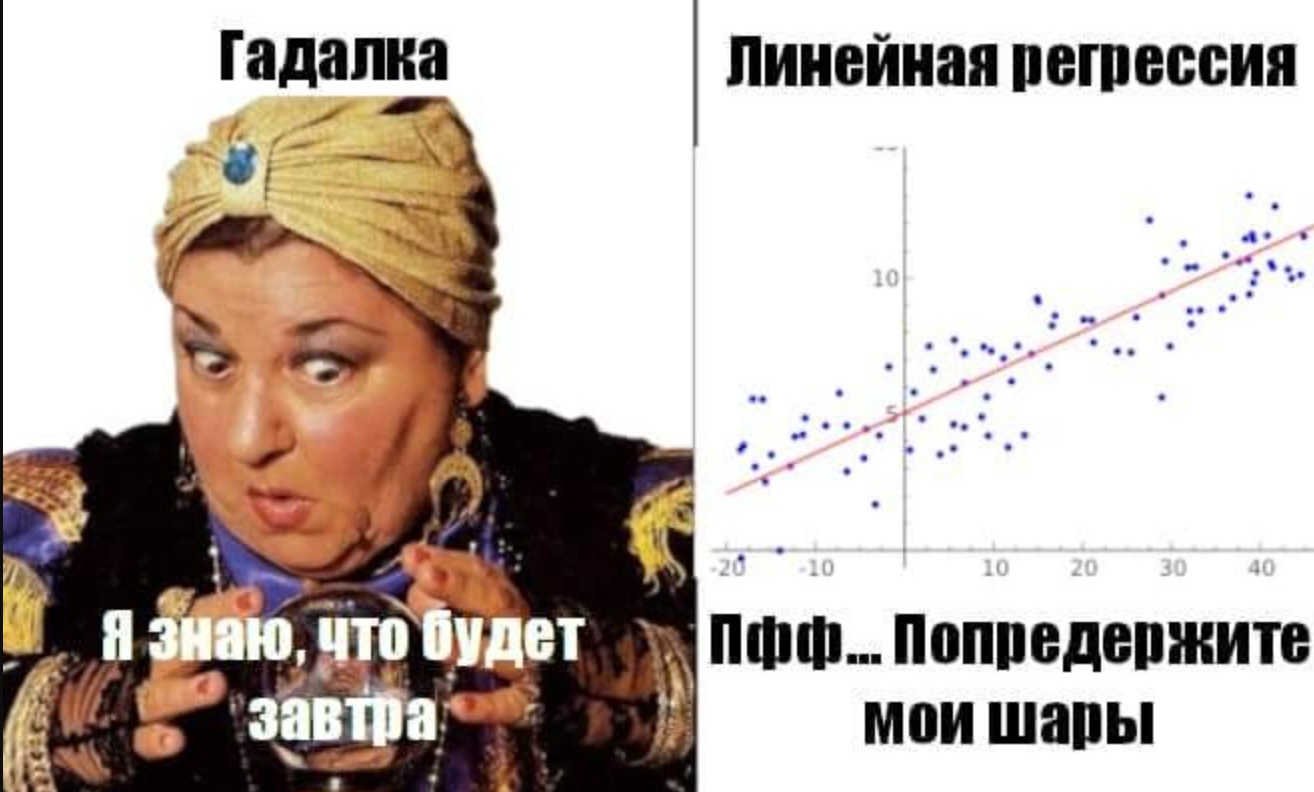

### <b> <span style='color:Orange'> 3 попытка. Факторный анализ для всех метрических переменных. (неплохой результат) </span> </b>

#### КМО

In [63]:
df_factors_2 = df.select_dtypes(include=[np.number]).dropna()
df_factors_2 = df_factors_2.drop(columns=region_dummies + income_dummies + development_dummies)

In [64]:
_, kmo_model = calculate_kmo(df_factors_2)
kmo_model #KMO

0.4358801520247494

КМО ниже среднего, попробуем убрать часть перемернных, которые сильно коррелируют

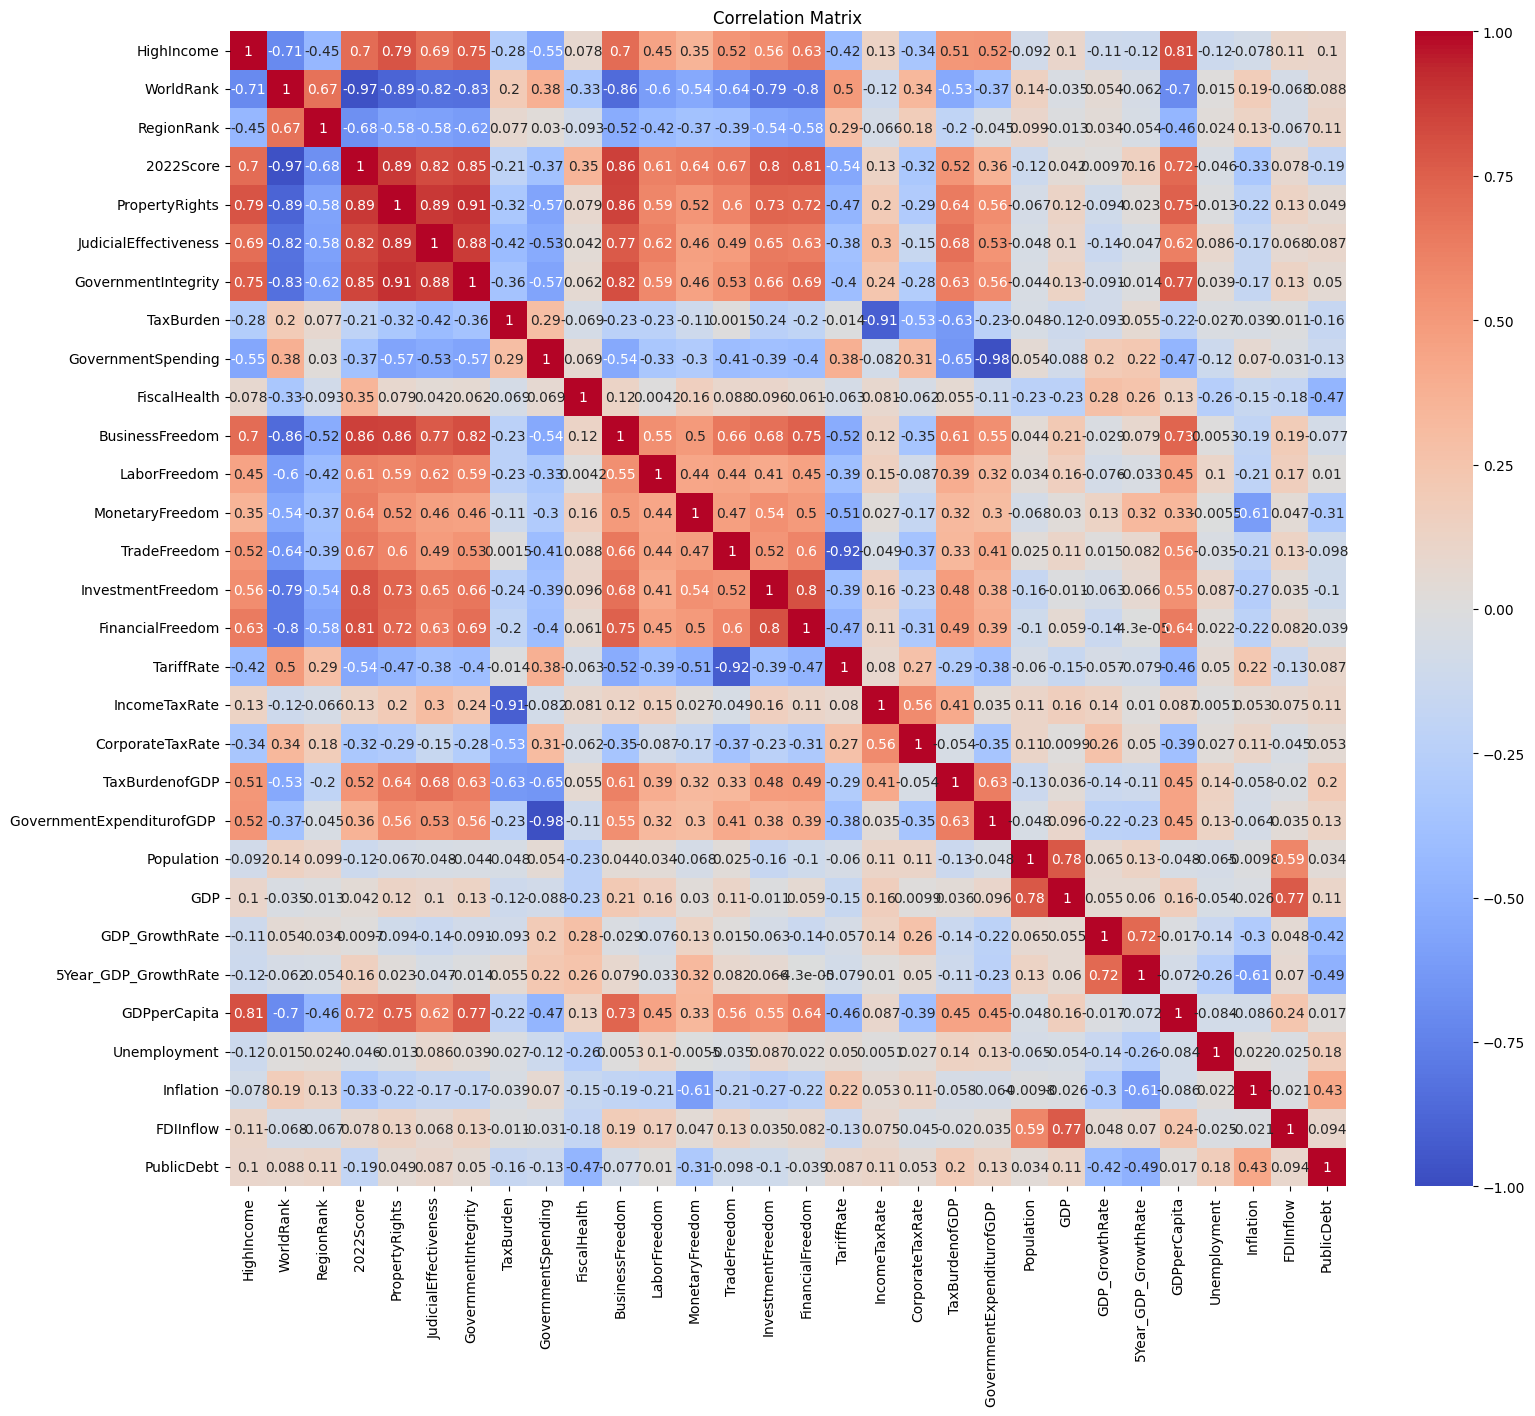

In [65]:
corr_matrix = df_factors_2.corr()

plt.figure(figsize=(18,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [66]:
started_metric_cols_upd = list(df_factors_2.columns).copy()
started_metric_cols_upd.remove("2022Score")
started_metric_cols_upd.remove("PropertyRights")
started_metric_cols_upd.remove("JudicialEffectiveness")
started_metric_cols_upd.remove("GovernmentIntegrity")

started_metric_cols_upd_without_target = started_metric_cols_upd.copy()
started_metric_cols_upd_without_target.remove("GDPperCapita")

In [67]:
df_factors_2_upd = df[started_metric_cols_upd_without_target]
df_factors_2_upd = df_factors_2_upd.dropna(subset = started_metric_cols_upd_without_target)

In [68]:
_, kmo_model_upd = calculate_kmo(df_factors_2_upd)
kmo_model_upd #KMO

0.7313594105237572

С коэффициентом KMO, равным 0,73 данные подходят для факторного анализа. Получается, что большая часть дисперсии переменных является общей и может быть адекватно объяснена с помощью факторного анализа. Такие данные обеспечивают прочную основу для выявления основных факторов или компонент, которые могут описывать взаимосвязи между переменными.

#### Определяем количество факторов

In [69]:
fa2 = FactorAnalyzer(n_factors=len(started_metric_cols_upd_without_target), rotation='varimax', method='principal') 
fa2.fit(df_factors_2_upd)
print(f"Строим факторную модель для {len(started_metric_cols_upd_without_target)} факторов, что соответствует общему числу независемых метрических переменных")

Строим факторную модель для 25 факторов, что соответствует общему числу независемых метрических переменных


In [71]:
ev, v = fa2.get_eigenvalues()
len_ev = len(ev[ev > 1])
print(ev[ev > 1])
print(f"{len_ev} собственных значений выше 1, значит нужно оставить {len_ev}  факторов")

[7.43754952 3.2734608  2.75666141 2.51184998 1.55665869 1.24225268]
6 собственных значений выше 1, значит нужно оставить 6  факторов


In [86]:
x_values = list(range(1, df_factors_2_upd.shape[1] + 1))
y_values = ev

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x_values,
    y=y_values,
    mode='markers+lines', 
    name='Eigenvalues',
    marker=dict(color='blue', size=8),
    line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=x_values,
    y=[1]*len(x_values),
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Threshold y=1'
))

fig.update_layout(
    title='Scree Plot',
    xaxis_title='Factors',
    yaxis_title='Eigenvalue',
    template='plotly_white',
    showlegend=True,
    xaxis=dict(showgrid=True, zeroline=True, zerolinewidth=1, zerolinecolor='grey'),
    yaxis=dict(showgrid=True, zeroline=True, zerolinewidth=1, zerolinecolor='grey'),
    plot_bgcolor='white'
)

fig.show()


In [72]:
fa2 = FactorAnalyzer(n_factors=len_ev, rotation='varimax', method='principal') 
fa2.fit(df_factors_2_upd)

FactorAnalyzer(method='principal', n_factors=6, rotation='varimax',
               rotation_kwargs={})

#### Описываем полученные факторы

In [73]:
facts = []
for i in range(len_ev):
    facts.append(f"Factor_{i+1}")
factors2 = pd.DataFrame(data=fa2.loadings_, 
                       index=df_factors_2_upd.columns, 
                       columns=facts)
factors2

Factor_1  Factor_2  Factor_3  Factor_4  Factor_5  \
HighIncome                  0.692909 -0.156608  0.048592  0.031390  0.389486   
WorldRank                  -0.931700 -0.037512 -0.034806  0.066561 -0.144487   
RegionRank                 -0.804028  0.016557 -0.003352  0.034395  0.292445   
TaxBurden                  -0.168606  0.041189 -0.932436 -0.019563 -0.243918   
GovernmentSpending         -0.276730  0.094313 -0.033800  0.002763 -0.914567   
FiscalHealth                0.141795  0.320190  0.079494 -0.319326 -0.049843   
BusinessFreedom             0.810106  0.059571  0.032587  0.135611  0.367391   
LaborFreedom                0.642793  0.049009  0.120788  0.128119  0.138558   
MonetaryFreedom             0.568928  0.544575 -0.025840 -0.036193  0.216370   
TradeFreedom                0.674034  0.156150 -0.236541  0.141321  0.340935   
InvestmentFreedom           0.816568  0.102577  0.092681 -0.116300  0.151604   
FinancialFreedom            0.861148  0.002254  0.014145 -0.027245  0.166699   
TariffRate                 -0.545685 -0.211097  0.237421 -0.180207 -0.360636   
IncomeTaxRate               0.108842 -0.012950  0.923417  0.095859  0.037904   
CorporateTaxRate           -0.311970  0.086008  0.737814  0.033174 -0.287172   
TaxBurdenofGDP              0.451401 -0.094598  0.441180 -0.095937  0.601827   
GovernmentExpenditurofGDP   0.278236 -0.105253 -0.019718  0.008081  0.906411   
Population                 -0.107294  0.055785  0.055192  0.873333 -0.027596   
GDP                         0.072352 -0.005529  0.079178  0.928515  0.067246   
GDP_GrowthRate             -0.125457  0.711297  0.209637  0.084896 -0.111553   
5Year_GDP_GrowthRate        0.007577  0.852118  0.024142  0.108370 -0.143898   
Unemployment                0.026741 -0.092189  0.046833 -0.112048  0.053469   
Inflation                  -0.208963 -0.792037  0.084188  0.008403 -0.091043   
FDIInflow                   0.131649 -0.012818 -0.012415  0.847559 -0.029649   
PublicDebt                 -0.059244 -0.681881  0.139704  0.137676  0.115292   

                            Factor_6  
HighIncome                 -0.216252  
WorldRank                   0.152795  
RegionRank                  0.019609  
TaxBurden                   0.028139  
GovernmentSpending         -0.068006  
FiscalHealth               -0.634344  
BusinessFreedom            -0.094434  
LaborFreedom                0.197378  
MonetaryFreedom             0.175782  
TradeFreedom               -0.093006  
InvestmentFreedom           0.094147  
FinancialFreedom            0.026228  
TariffRate                  0.059506  
IncomeTaxRate              -0.054401  
CorporateTaxRate            0.113179  
TaxBurdenofGDP              0.053635  
GovernmentExpenditurofGDP   0.097463  
Population                  0.012025  
GDP                         0.004636  
GDP_GrowthRate             -0.241674  
5Year_GDP_GrowthRate       -0.168662  
Unemployment                0.782878  
Inflation                  -0.218501  
FDIInflow                   0.016353  
PublicDebt                  0.270448

<b> Фактор 1: "Экономическая свобода и конкурентоспособность" </b>
Переменные, которые показывают высокие загрузки на фактор "Экономическая свобода и конкурентоспособность": 
<br> - FinancialFreedom	- 0,861
<br> - InvestmentFreedom - 0,817
<br> - BusinessFreedom - 0,810
<br> - HighIncome - 0,693
<br> - TradeFreedom - 0,674
<br> - LaborFreedom - 0,643
<br> - MonetaryFreedom - 0,569
<br> <b> Обоснование наименования: </b> Данный фактор сильно связан с различными аспектами экономической свободы, которые влияют на способность страны конкурировать на международном уровне. Включение таких переменных, как свобода бизнеса, инвестиций, финансов и торговли, подчеркивает важность открытой и свободной экономической политики для стимулирования экономической активности.


<b> Фактор 2: "Экономический рост и устойчивость" </b>
<br> - 5Year_GDP_GrowthRate - 0,852
<br> - GDP_GrowthRate - 0,711
<br> <b> Обоснование наименования: </b> Этот фактор объединяет показатели, связанные с ростом ВВП и государственными расходами, что подчеркивает важность управления государственными финансами и их влияние на экономический рост.


<b> Фактор 3: "Налоговая нагрузка и регулирование" </b>
Переменные, которые показывают высокие загрузки на фактор "Налоговая нагрузка и регулирование": 
<br> - IncomeTaxRate - 0,923
<br> - CorporateTaxRate - 0,738
<br> <b> Обоснование наименования: </b> Данный фактор включает в себя элементы, связанные с налогообложением и его влиянием на экономическую деятельность, подчеркивая, как налоговая политика и корпоративные налоги могут воздействовать на бизнес-среду.


<b> Фактор 4: "Демографический потенциал" </b>
<br> - GDP 0,929
<br> - Population 0,873
<br> - FDIInflow 0,848
<br> <b> Обоснование наименования: </b> Значительные загрузки на население и ВВП указывают на то, что этот фактор отражает общую экономическую массу и демографические аспекты, которые являются основой экономической мощи страны.


<b> Фактор 5: "Фискальная нагрузка" </b>
<br> - TaxBurdenofGDP 0,602
<br> - GovernmentExpenditurofGDP 0,906
<br> <b> Обоснование наименования: </b> Фокус на налоговой нагрузке в отношении ВВП и государственных расходах подчеркивает важность фискальной политики и её влияние на экономику.


<b> Фактор 6: "Социальная устойчивость" </b>
<br> - Unemployment 0,783
<br> - PublicDebt 0.270
<br> <b> Обоснование наименования: </b> Связь с уровнем безработицы и государственным долгом указывает на то, что этот фактор отражает социальную стабильность и финансовую устойчивость, важные для социально-экономического здоровья нации.

In [74]:
rename_dict = {
    "Factor_1": 'Economic freedom and competitiveness',
    "Factor_2": 'Economic growth and sustainability',
    "Factor_3": 'Tax burden and regulation',
    "Factor_4" : "Demographic potential",
    "Factor_5" : "Fiscal burden",
    "Factor_6" : "Social sustainabilit"
}

factors2.rename(columns=rename_dict, inplace=True)

#### Процент вариации исходных переменных, объяснённой факторной моделью. 

In [75]:
cumulative_variances_2 = fa2.get_factor_variance()[2]
factor_variance_2 = pd.DataFrame(data=fa2.get_factor_variance()[1:3],
                              index=['Proportional variance', 'Cumulative variance'],
                              columns=factors2.columns)
factor_variance_2

Economic freedom and competitiveness  \
Proportional variance                              0.246459   
Cumulative variance                                0.246459   

                       Economic growth and sustainability  \
Proportional variance                            0.115401   
Cumulative variance                              0.361860   

                       Tax burden and regulation  Demographic potential  \
Proportional variance                   0.107712               0.105003   
Cumulative variance                     0.469572               0.574576   

                       Fiscal burden  Social sustainabilit  
Proportional variance       0.119440              0.057121  
Cumulative variance         0.694016              0.751137

Накопленная вариация показывает, что в сумме <b> шесть факторов объясняют 75.11% общей вариации всех переменных </b>, при этом:

<b> Фактор 1 "Экономическая свобода и конкурентоспособность" объясняет 24,64% </b>общей вариации. Это наибольший вклад среди шести факторов, что указывает на его значимость в структуре данных.

<b> Фактор 2 "Экономический рост и устойчивость" объясняет 11,54% </b>вариации, что также является значительным, однако и меньше, чем у первого фактора.

<b> Фактор 3 "Налоговая нагрузка и регулирование" объясняет 10,77% </b>вариации, что делает его важным, но менее значимым по сравнению с предыдущими факторами.

<b> Фактор 4 "Демографический потенциал" объясняет 10,50% </b>вариации, что также делает его важным, но менее значимым по сравнению с предыдущими факторами.

<b> Фактор 5 "Фискальная нагрузка" объясняет 11,94% </b>вариации, что также является значительным, по сравнению со 2, 3 и 4 факторами.

<b> Фактор 6 "Социальная устойчивость" объясняет 5,71% </b>вариации, что является наименее значительным, среди всех факторов.

#### Формируем итоговый датасет с полученными факторами и категориальными переменными.

In [76]:
transformed = pd.DataFrame(data=fa2.transform(df_factors_2_upd),
                           index=df_factors_2_upd.index,
                           columns=factors2.columns)

In [77]:
df2_fact_2 = pd.concat([df[list(region_dummies.columns) + list(development_dummies.columns) + ["GDPperCapita"] + list(income_dummies.columns)], 
 transformed], 
 axis=1)

In [78]:
df2_model_fact_2 = df2_fact_2.dropna()
df2_model_fact_2.shape

(170, 17)

#### Объеденим дамми-переменные по регионам, вместо 5 получим 3

In [79]:
dummies_list_region = ["Region_Americas", "Region_Asia-Pacific", "Region_Europe", "Region_Middle East and North Africa", "Region_Sub-Saharan Africa"]
dummies_list_develop = ["Development_developed", "Development_developing"]
for i in dummies_list_develop:
    print(df2_model_fact_2[i].value_counts())

Development_developed
0    132
1     38
Name: count, dtype: int64
Development_developing
1    132
0     38
Name: count, dtype: int64


In [80]:
# Создаем новую колонку для Западных регионов
df2_model_fact_2['Western_Regions'] = df2_model_fact_2['Region_Americas'] + df2_model_fact_2['Region_Europe']
df2_model_fact_2['Western_Regions'] = df2_model_fact_2['Western_Regions'].apply(lambda x: 1 if x > 0 else 0)

# Создаем новую колонку для Восточных регионов
df2_model_fact_2['Eastern_Regions'] = df2_model_fact_2['Region_Asia-Pacific'] + df2_model_fact_2['Region_Middle East and North Africa']
df2_model_fact_2['Eastern_Regions'] = df2_model_fact_2['Eastern_Regions'].apply(lambda x: 1 if x > 0 else 0)

# Колонка для Африки останется такой же
df2_model_fact_2['Africa'] = df2_model_fact_2['Region_Sub-Saharan Africa']

# Удаляем старые колонки
df2_model_fact_2 = df2_model_fact_2.drop(columns=['Region_Americas', 'Region_Asia-Pacific', 'Region_Europe', 
                      'Region_Middle East and North Africa', 'Region_Sub-Saharan Africa'])

#### В качетсве референтных групп возьмем Western_Regions, Income_high income и Development_developed

In [81]:
col_without_referent_and_target = list(df2_model_fact_2.columns)
col_without_referent_and_target.remove("Western_Regions")
col_without_referent_and_target.remove("Income_high income")
col_without_referent_and_target.remove("GDPperCapita")
col_without_referent_and_target.remove("Development_developed")

В рамках данной модели можно выдвинуть следующие <b> гипотезы: </b>

1) На переменную "ВВП на душу населения" в наибольшей степени будет влиять Factor_1 (Экономическая свобода и конкурентоспособность);
2) Переменная Factor_1 (Экономическая свобода и конкурентоспособность) будет статистически значимой;
3) На переменную "ВВП на душу населения" менее сильное влияние, по сравнению с первым фактором, окажет Factor_5 (Фискальная нагрузка);
4) Переменная Factor_5 (Фискальная нагрузка) будет статистически значимой;
5) На переменную "ВВП на душу населения" менее сильное влияние, по сравнению со пятым фактором, окажет Factor_2 (Экономический рост и устойчивость);
6) Переменная Factor_2 (Экономический рост и устойчивость) будет статистически значимой;
7) На переменную "ВВП на душу населения" менее сильное влияние, по сравнению со вторым фактором, окажет Factor_3 (Налоговая нагрузка и регулирование);
8) Переменная Factor_3 (Налоговая нагрузка и регулирование) будет статистически значимой;
9) На переменную "ВВП на душу населения" менее сильное влияние, по сравнению с третьим фактором, окажет Factor_4 (Демографический потенциал);
10) Переменная Factor_4 (Демографический потенциал) будет статистически значимой;
11) На переменную "ВВП на душу населения" в наименьшей степени (среди 6-ти полученных факторов) будет влиять Factor_6 (Социальная устойчивость);
12) Переменная Factor_1 (Социальная устойчивость) будет статистически значимой;
13) Страны, которые относятся к среднедоходным и низкодоходным, влияют на ВВП меньше, чем высокодоходные страны;
14) Категориальная переменная income будет статистически значимой;
15) Принадлежность к странам, находящимся в восточном регионе и Африке, в меньшей степени влияет на ВВП, чем принадлежность к странам западного региона;
16) Категориальная переменная region будет статистически значимой;
17) Принадлженость к развитым страны в большей степени влияет на ВВП, чем принадлежность к развивающимся странам;
18) Категориальная переменная development будет статистически значимой.

#### Строим модель

In [82]:
x_mult_fact_2 = df2_model_fact_2[col_without_referent_and_target]
y_fact_2 = df2_model_fact_2['GDPperCapita']
x_mult_constant_fact_2 = sm.add_constant(x_mult_fact_2)
model_fact_2 = sm.OLS(y_fact_2, x_mult_constant_fact_2).fit()
print(model_fact_2.summary())

                            OLS Regression Results                            
Dep. Variable:           GDPperCapita   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     38.06
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           7.14e-39
Time:                        15:58:26   Log-Likelihood:                -1826.5
No. Observations:                 170   AIC:                             3677.
Df Residuals:                     158   BIC:                             3715.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [81]:
from scipy.stats.mstats import zscore
print(sm.OLS(zscore(y_fact_2), zscore(x_mult_fact_2)).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:           GDPperCapita   R-squared (uncentered):                   0.726
Model:                            OLS   Adj. R-squared (uncentered):              0.707
Method:                 Least Squares   F-statistic:                              38.30
Date:                Sun, 13 Oct 2024   Prob (F-statistic):                    3.84e-39
Time:                        15:25:57   Log-Likelihood:                         -131.18
No. Observations:                 170   AIC:                                      284.4
Df Residuals:                     159   BIC:                                      318.8
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------

#### Уравнение регрессии. Оценка характеристик регрессионной модели.

In [30]:
l = []
for (param, index) in zip(model_fact_2.params[1:], model_fact_2.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))
    
print('Y = {:2f} + {}'.format(model_fact_2.params[0], ' + '.join(l)))

Y = 39482.839643 + -1649.54*Development_developing + -26510.26*Income_low income + -23711.29*Income_middle income + 6021.15*Economic freedom and competitiveness + 232.50*Economic growth and sustainability + -295.72*Tax burden and regulation + 1749.65*Demographic potential + 1431.43*Fiscal burden + -1985.68*Social sustainabilit + 837.49*Eastern_Regions + -2939.74*Africa


<b> Полученное уравнение множественной регрессии: </b>
<br> Y = 39482.839643 - 1649.54\*Development_developing - 26510.26\*Income_low income - 23711.29\*Income_middle income + 6021.15\*Economic freedom and competitiveness + 232.50\*Economic growth and sustainability - 295.72\*Tax burden and regulation + 1749.65\*Demographic potential + 1431.43\*Fiscal burden - 1985.68\*Social sustainabilit + 837.49\*Eastern_Regions - 2939.74\*Africa

Общая характеристика полученной модели:

<b> R-squared = 0,726 </b> 
Модель объясняет 72.6% дисперсии ВВП на душу населения. Это довольно высокий показатель, который указывает на хорошую объясняющую способность модели.

<b> Adj. R-squared = 0,707 </b> 
Скорректированный коэффициент детерминации также высок, что подтверждает, что модель хорошо адаптирована даже после учета числа включенных предикторов.

<b> F-statistic = 38,06 и Prob (F-statistic) = 7.14e-39 </b>
Модель статистически значима, с очень малым p-значением F-статистики.

In [31]:
print('R^2 = {:f}'.format(model_fact_2.rsquared))
print('F-test significance = {:f}'.format(model_fact_2.f_pvalue))

R^2 = 0.725994
F-test significance = 0.000000


Модель статистически значима. Объясняет 72,6% вариации значений зависимой переменной.

In [168]:
p = stats.kstest(model_fact_2.resid, 'norm', args=(model_fact_2.resid.mean(), model_fact_2.resid.std())).pvalue
print('P-value: {:.4f}'.format(p))

P-value: 0.0067


Из теста Колмагорова-Смирнова видно (по значению p-val), что статки модели не являются нормально распределёнными.

<Axes: ylabel='Density'>

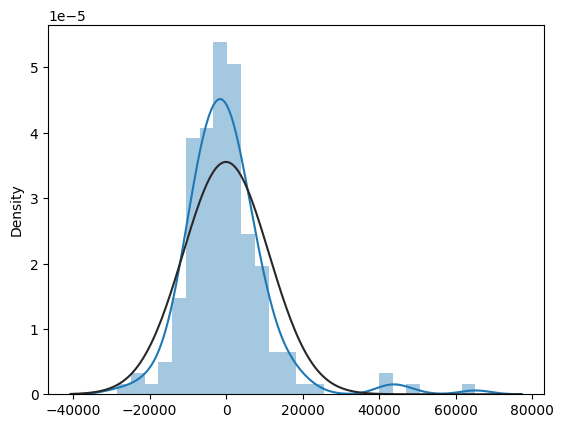

In [169]:
sns.distplot(model_fact_2.resid, fit=stats.norm) 

Распределение остатков на графике показывает, что распределение остатков не является нормальным (что подтверждается предыдущим тестом).
Также видно, что остатки показывают некоторую положительную скошенность, так как более тяжелый хвост находится справа.
Можно отметить наличие потенциальных выбросов, что видно из длинных хвостов, особенно в правой части графика.

In [84]:
hover_texts = ['Country name: {}'.format(id_val) for id_val in df['CountryName']]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=model_fact_2.fittedvalues, 
    y=model_fact_2.resid,
    mode='markers',
    marker=dict(color='lightblue', size=10, line=dict(color='black', width=1)),
    text=hover_texts,
    hoverinfo='text+x+y'
))
fig.update_layout(
    title='Гетероскедастичность',
    xaxis_title='Fitted value',
    yaxis_title='Residual',
    template='plotly_white',
    xaxis=dict(showgrid=True, zeroline=True, zerolinewidth=1, zerolinecolor='grey'),
    yaxis=dict(showgrid=True, zeroline=True, zerolinewidth=1, zerolinecolor='grey'),
    plot_bgcolor='white'
)

fig.show()

График показывает признаки гетероскедастичности - видно, что величина остатков увеличивается с увеличением подогнанных значений. Хотя многие остатки кажутся случайно распределенными вокруг нуля, видны определенные паттерны распределения, особенно при более высоких предсказанных значениях.

Точки в правом верхнем правом углу указывают на наличие выбросов, например самый правый верхний угол - Киргизия, а самое правое значение - Танзания.


In [34]:
vifs = np.array([vif(model_fact_2.model.exog, i) for i in range(model_fact_2.model.exog.shape[1])])

In [35]:
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model_fact_2.params.index[1:]
vif_df.sort_values(by=['VIF'])

VIF                              Features
6   1.081987                 Demographic potential
4   1.168543    Economic growth and sustainability
8   1.337299                  Social sustainabilit
5   1.344262             Tax burden and regulation
9   1.652331                       Eastern_Regions
10  2.492858                                Africa
7   2.541907                         Fiscal burden
3   3.790275  Economic freedom and competitiveness
0   3.981436                Development_developing
1   4.263860                     Income_low income
2   4.782201                  Income_middle income

Нет значений VIF, превышающих 10. Проблема мультиколлинеарности отсутствует. Рассмотрим немного подробнеее:

Переменные (Demographic potential, Economic growth and sustainability, Social sustainability, Tax burden and regulation, Eastern_Regions, Africa, Fiscal burden) показывают низкие значения VIF, что указывает на отсуствие взаимной линейной зависимости между этими переменными и другими в модели.

Переменные (Economic freedom and competitivenes, Development_developing, Income_low income, Income_middle income) показывают самые высокие значения VIF, однако, находятся ниже порогового значения (10), может указывать на некоторую взаимосвязь между переменными, однако значения все равно не так высоки.

#### Оценка значимости регрессионных коэффициентов.

In [38]:
f'Статистически значимые параметры модели: {model_fact_2.pvalues[model_fact_2.pvalues < 0.05].index.values}'

"Статистически значимые параметры модели: ['const' 'Income_low income' 'Income_middle income'\n 'Economic freedom and competitiveness']"

In [39]:
f'Статистически не значимые параметры модели: {model_fact_2.pvalues[model_fact_2.pvalues > 0.05].index.values}'

"Статистически не значимые параметры модели: ['Development_developing' 'Economic growth and sustainability'\n 'Tax burden and regulation' 'Demographic potential' 'Fiscal burden'\n 'Social sustainabilit' 'Eastern_Regions' 'Africa']"

Как мы видим, из шести полученных факторов, лишь один из них (Economic freedom and competitiveness) отностится к статистически значимым параметрам модели. Помимо этого к статистически значимым параместрам относится переменная, указывающая на принадлежность к группе стран с определенным уровнем дохода. 

Важно отметить, что по сути, мы получили такой же результат, как у предыдущей модели - один общий фактор и значимость уровня дохода, а остальные переменные статистически не значимы. Возможно, это нам говорит о том, что сгруппировать часть сильно коррелируемых переменных в один фактор является оптимальным вариантом для данного датасета.

По полученным данным можно принять и отклонить выдвинутые гипотезы (отметим красным гипотезы, <span style='color:Red'> которые неподтвердились </span> и <span style='color:Green'> зеленым, которые подвердились </span> и <span style='color:Orange'> оранжевым, которые подвердились частично</span>)

1) <span style='color:Orange'> На переменную "ВВП на душу населения" в наибольшей степени будет влиять Factor_1 (Экономическая свобода и конкурентоспособность) - Частичное подтверждение, так как среди положительных значений коэффициентов наибольшее влияние, а вот среди значений по модулю - нет;
2) <span style='color:Green'> Переменная Factor_1 (Экономическая свобода и конкурентоспособность) будет статистически значимой - подтверждаем, p-val < 0,05;
3) <span style='color:Green'> На переменную "ВВП на душу населения" менее сильное влияние, по сравнению с первым фактором, окажет Factor_5 (Фискальная нагрузка) - подтверждаем, так как 0,0568 < 0,2890;
4) <span style='color:Red'> Переменная Factor_5 (Фискальная нагрузка) будет статистически значимой - не подтверждаем, p-val > 0,05;
5) <span style='color:Red'> На переменную "ВВП на душу населения" менее сильное влияние, по сравнению со пятым фактором, окажет Factor_2 (Экономический рост и устойчивость) - не подтверждаем, так как 0,0108 < 0,2890;
6) <span style='color:Red'> Переменная Factor_2 (Экономический рост и устойчивость) будет статистически значимой - не подтверждаем, p-val > 0,05;
7) <span style='color:Green'> На переменную "ВВП на душу населения" менее сильное влияние, по сравнению со вторым фактором, окажет Factor_3 (Налоговая нагрузка и регулирование) - подтверждаем -0,0138 < 0,0568 (даже если брать модуль, это подверждается);
8) <span style='color:Red'> Переменная Factor_3 (Налоговая нагрузка и регулирование) будет статистически значимой - не подтверждаем, p-val > 0,05;
9) <span style='color:Red'> На переменную "ВВП на душу населения" менее сильное влияние, по сравнению с третьим фактором, окажет Factor_4 (Демографический потенциал) - не подтверждаем -0,0138 < 0,0816 (даже если взять по модулую, то не подтвердиться);
10) <span style='color:Red'> Переменная Factor_4 (Демографический потенциал) будет статистически значимой - не подтверждаем, p-val > 0,05;
11) <span style='color:Orange'> На переменную "ВВП на душу населения" в наименьшей степени (среди 6-ти полученных факторов) будет влиять Factor_6 (Социальная устойчивость) - частично подтверждаем, т.к. по модулю значение коэффициента не самое низкое, а вот по абсолютному значению самое низкое;
12) <span style='color:Red'> Переменная Factor_1 (Социальная устойчивость) будет статистически значимой - не подтверждаем, p-val > 0,05;
13) <span style='color:Green'> Страны, которые относятся к среднедоходным и низкодоходным, влияют на ВВП меньше, чем высокодоходные страны - подтверждается, так как обе переменные имеют отрицательный коэффициент;
14) <span style='color:Green'> Категориальная переменная income будет статистически значимой - подтверждаем, p-val < 0,05;
15) <span style='color:Red'> Принадлежность к странам, находящимся в восточном регионе и Африке, в меньшей степени влияет на ВВП, чем принадлежность к странам западного региона - т.к. у Африки отрицательный коэффициент, то подтверждаем, а вот у восточного региона положительный, значит отрицаем. Получается частичное подтверждение;
16) <span style='color:Red'> Категориальная переменная region будет статистически значимой - не подтверждаем, p-val > 0,05;
17) <span style='color:Green'> Принадлежность к развитым странам в большей степени влияет на ВВП, чем принадлежность к развивающимся странам - принимаем, так как переменная имеет отрицательный коэффициент;
18) <span style='color:Red'> Категориальная переменная development будет статистически значимой - не подтверждаем, p-val > 0,05.

#### Интерпритация взаимосвязи между каждым из предикторов и зависимой переменной

Рассмотрим каждый полученный коэффициент отдельно:

<br> <b> Константа (39482,839643): </b> Это базовый уровень ВВП на душу населения, когда все другие переменные принимают значение 0.
<br> <b> 1) Economic freedom and competitiveness (6021,15): </b> Можно отметить, что увеличение фактора "Экономическая свобода и конкурентоспособность" на одну единицу, в среднем, увеличивает ВВП на душу населения на 6021,15$.
<br> <b> 2) Economic growth and sustainability (232,50): </b> Фактор "Экономический рост и устойчивость", в среднем, увеличивает ВВП на душу населения на 232,50$. Важно помнить, что даннный фактор не является статистически значимым в полученной модели.
<br> <b> 3) Tax burden and regulation (-295,72): </b> По данному значению коэффициента, можно сказать, что фактор "Налоговая нагрузка и регулирование" при увеличении на единицу, снижает ВВП на душу населения на 295,72$. Важно помнить, что даннный фактор не является статистически значимым в полученной модели.
<br> <b> 4) Demographic potential (1749,65): </b> При изменении фактора "Демографический потенциал" на одну единицу, в среднем, ВВП на душу населения в государстве, увеличивается на 1749,65$. Важно помнить, что даннный фактор не является статистически значимым в полученной модели.
<br> <b> 5) Fiscal burden (1431,43): </b> Положительный коэффициент при факторе "Фискальная нагрузка" говорит о том, что при увеличении данного фактора на единицу ВВП на душу населения, в среднем, вырастает на 1431,43$. Важно помнить, что даннный фактор не является статистически значимым в полученной модели.
<br> <b> 6) Social sustainability (-1985,68): </b> Фактор "Социальная устойчивость" в данной модели показывает отрицательное влияние. При изменении данного фактора на единицу, в среднем, ВВП в государстве снижается на 1985,68$. Важно помнить, что даннный фактор не является статистически значимым в полученной модели.
<br>----------------------------------------------------------------------------------------

Напомним, что в качетсве референтных групп были взяты Western_Regions, Income_high income и Development_developed

<br> <b> 7) Eastern_Regions (837,49): </b> В качестве референтной группы выбрана перменная Western_Regions (Западные регионы), которая объединила в себе страны Америки и Европы. Получается, что ВВП восточного региона (Eastern_Region), который включил в себя Азиатско-Тихоокеанские страны и страны Ближнего Востока и Севернаой Африки, и ВВП западного региона (Western_Regions) отличается. У стран восточного региона, в среднем, ВВП на 837,49$ ниже, чем у стран западного региона. Важно помнить, что даннный фактор не является статистически значимым в полученной модели.
<br> <b> 8) Africa (-2939,74): </b> Аналогично стран восточного региона, можно сказать и про страны Африки (Africa). Получается, что ВВП стран Африки, и ВВП западного региона тоже отличается. У стран Африки, в среднем, ВВП на 2939,74$ ниже, чем у стран западного региона. Важно помнить, что даннный фактор не является статистически значимым в полученной модели.
<br>----------------------------------------------------------------------------------------
<br> <b> 9) Development_developing (-1649,54): </b> В качестве референтной группы выбрана перменная Development_developed (Развитые страны). Получается, что ВВП развитых стран и ВВП развивающихся стран отличается. У развивающихся стран, в среднем, ВВП на 1649,54$ ниже, чем у развитых стран. Важно помнить, что даннный фактор не является статистически значимым в полученной модели.
<br>----------------------------------------------------------------------------------------
<br> <b> 10) Income_low income (-26510,26): </b> В качестве референтной группы выбраны страны, принадлежащие к группе стран с высоким доходом. Получается, что у стран, которые относятся к странам с низким уровнем дохода, ВВП, в среднем, ниже на 26510,26$, чем у стран с высоким уровнем дохода.
<br> <b> 11) Income_middle income (-23711,29): Страны со средним уровнем дохода имеют, в среднем, на 23711,29$ меньше ВВП на душу населения по сравнению с высокодоходными странами.

#### Проведите диагностику модели. Есть ли в модели выбросы и/или влияющие наблюдения, сколько их? Чем это может объясняться?

In [41]:
influence = model_fact_2.get_influence()
inf_sum = influence.summary_frame()

In [42]:
inf_sum['dffits'][(inf_sum['dffits']>1) | (inf_sum['dffits']<-1)].sort_values()
#потенциальные влияющие наблюдения

CountryID
78     1.041644
99     1.286842
134    1.383406
147    1.440677
Name: dffits, dtype: float64

In [44]:
print(df.loc[[78, 134, 147, 99], 'CountryName'])

CountryID
78        Ireland
134         Qatar
147     Singapore
99     Luxembourg
Name: CountryName, dtype: object


Как мы видим, Ирландия, Катар, Сингапур и Люксембург относятся к странам, которые потенциально оказывают влияние на построенную модель множественной регрессии

In [43]:
inf_sum['standard_resid'][(inf_sum['standard_resid']>3) | (inf_sum['standard_resid']<-3)].sort_values()
#потенциальные выбросы

CountryID
78     3.791633
147    3.876235
134    4.252610
99     5.714402
Name: standard_resid, dtype: float64

In [45]:
print(df.loc[[78, 134, 147, 99], 'CountryName'])

CountryID
78        Ireland
134         Qatar
147     Singapore
99     Luxembourg
Name: CountryName, dtype: object


Как мы видим, Ирландия, Катар, Сингапур и Люксембург относятся не только к странам, которые потенциально оказывают влияние на построенную модель множественной регрессии, но и к потенциальным выбросам.

Возможно, чтобы улучшить модель, необходимо удалить Ирландию, Катар, Сингапур и Люксембург из датасета

#### Кросс-валидация

In [46]:
X = df2_model_fact_2[col_without_referent_and_target]
y = df2_model_fact_2['GDPperCapita']

# Разобьем на 5 фолдов
kf = KFold(n_splits=5, shuffle=True, random_state=1)

r_squared = []

for train_index, test_index in kf.split(X):
    # Делим на обучающую и тестовую выборку
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Добавляем константу
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)

    # Тренируем модельку
    model = sm.OLS(y_train, X_train_const).fit()

    # Оцениваем тестовой выборке
    y_pred = model.predict(X_test_const)
    ss_res = np.sum((y_test - y_pred) ** 2)
    ss_tot = np.sum((y_test - np.mean(y_train)) ** 2)
    r_squared_value = 1 - (ss_res / ss_tot)
    
    r_squared.append(r_squared_value)

# Считаем средний R^2 по всем фолдам
mean_r_squared = np.mean(r_squared)
print(f"Средний R^2 по фолдам: {mean_r_squared:.4f}")

Средний R^2 по фолдам: 0.6584


Средний R² по полученной модели составил 0.6584. Это означает, что модель в среднем объясняет примерно 65.84% данных ВВП на душу населения на различных подвыборках данных.

#### Сформулируйте общие содержательные выводы по результатам регрессионного анализа данных. Какие результаты анализа данных для вас оказались очевидными, а какие неожиданными?

В целом, построенная модель достаточно неплохо справляется с поставленной задачей.

Изначально, мы предположили, что получится все переменные сразу же разбить на факторы. Однако, анализ КМО показал, что в этом нет смысла, поэтому мы удалили часть переменных.

После этого, мы предполагали, что все полученные факторы будут статистически значимыми. но после построения модели мы выяснили, что только один фактор статистически значим.

Также, как и в предыдущие попытки, нас удивило, что в странах восточного региона ВВП выше, чем в странах западного региона.

#### Заключительный мем

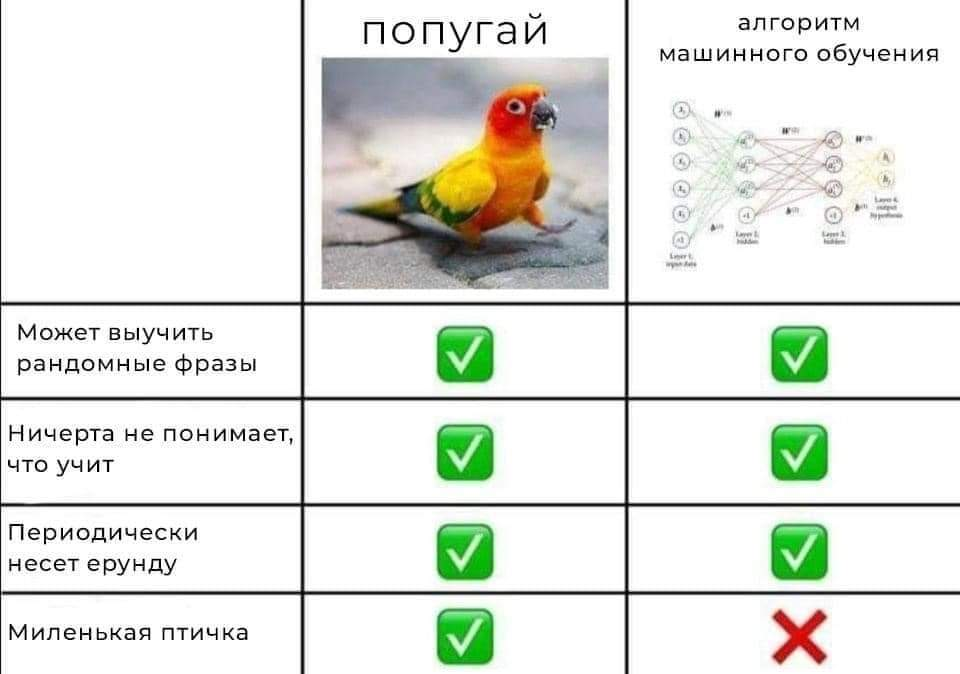

## Заключение

В данной работе мы построили три модели линейной регрессии, пытаясь выявить наилучшую.

<span style='color:Red'> В первой модели </span> мы применили PCA для сильно коррелирующих между собой переменных, предполагая, что они "сгруппируются" и смогут оказывать влияние на таргетную переменную. Мы выделили три главных компонента. Однако проведенная работа показала, что полученные компоненты статистически не значимы, а сама модель по результатам кросс-валидации объясняет 62.91% спрогнозирванных данных.

<span style='color:Green'> Во второй модели </span> мы решили использовать факторный анализ для сильно коррелирующих между собой переменных, предполагая, что они выделятся в одельный фактор, который в комбинации с другими метрическими и категориальными переменными покажает хороший результат прогнозирования. В итоге мы получили фактор, который статистически значим, а модель по результатам кросс-валидации объясняет 67.95% спрогнозированных данных. Однако, другие метрические переменные не оказались статистически значимыми.

<span style='color:Orange'> В третьей модели </span> мы попробовали взять все метрические переменные и провести по ним факторный анализ. В результате мы ожидали получить набор факторов, который будет статистически значим. В итоге мы получили 6 факторов, из которых только 1 фактор оказался статистически значим (получилас довольно-таки схожая ситуация со второй моделью). Данная модель по результатам кросс-валидации объясняет 65.84% спрогнозированных данных.

Также по всем полученным моделям были выявлены страны-потенциальные выбросы - Ирландия, Катар, Люксембург и Сингапур.

Обобщая вышесказанное делаем вывод, что наилучшей моделью (по нашему мнению) является вторая модель, которая предполагает, что статистически значимые параметры модели - это полученный фактор "Регуляторные ограничения" и категориальная переменная "Принадлежность стран к определенному уровню дохода". Для улучшения полученной модели можно удалить статистически не значимые переменные, а также страны-выбросы, скорее всего это приведет к более точному прогнозированию со стороны модели.
